<a href="https://colab.research.google.com/github/Yoshida-2002/thesis/blob/main/CEG_omo_on_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd /content/drive/MyDrive/B4yoshida/NILE with pytorch lightning
%ls
%pwd

/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning
' CEG omo on colab'           'data for CEG'     models                plot_figures/   sample.tsv
' CEG omo on colab のコピー'   lightning_logs/  'models のコピー'      result_log/     src/
 data/                         model/            model_transformers/   sample2.tsv


'/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning'

In [3]:
!pip install transformers
!pip install pytorch-lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.7/777.7 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 54.4 MB/s eta 0:00:00


# pathを辞書にまとめて管理する

In [4]:
path_dict = {
    # 生データのパス
    'raw_train_data' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/row/tsv/train2.tsv',
    'raw_test_data' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/row/tsv/test2.tsv',
    'raw_val_data' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/row/tsv/val2.tsv',

    # 欠損値処理を行った後のデータのパス
    'missing_value_processed_train_data' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/missing_value_processed/pocessed_train2.tsv',
    'missing_value_processed_test_data' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/missing_value_processed/pocessed_test2.tsv',
    'missing_value_processed_val_data' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/missing_value_processed/pocessed_val2.tsv',

    # 欠損値処理を行った後、さらなる整形を行ったデータ
    'input_for_lightning_model_train_base' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/base/input_train2.tsv',
    'input_for_lightning_model_test_base' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/base/input_test2.tsv',
    'input_for_lightning_model_val_base' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/base/input_val2.tsv',

    # 集合に分割した後のデータ (main)
    'main_input_for_lightning_model_train_data_true' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/set/main/train/true_set2.tsv',
    'main_input_for_lightning_model_train_data_false' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/set/main/train/false_set2.tsv',
    'main_input_for_lightning_model_test_data_true' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/set/main/test/true_set2.tsv',
    'main_input_for_lightning_model_test_data_false' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/set/main/test/false_set2.tsv',
    'main_input_for_lightning_model_val_data_true' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/set/main/val/true_set2.tsv',
    'main_input_for_lightning_model_val_data_false' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/set/main/val/false_set2.tsv',

    # 集合に分割した後のデータ (toy)
    'toy_input_for_lightning_model_train_data_true' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/set/toy/train/true_set2.tsv',
    'toy_input_for_lightning_model_train_data_false' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/set/toy/train/false_set2.tsv',
    'toy_input_for_lightning_model_test_data_true' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/set/toy/test/true_set2.tsv',
    'toy_input_for_lightning_model_test_data_false' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/set/toy/test/false_set2.tsv',
    'toy_input_for_lightning_model_val_data_true' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/set/toy/val/true_set2.tsv',
    'toy_input_for_lightning_model_val_data_false' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/set/toy/val/false_set2.tsv',

    # モデルを保存するPath
    'saved_model_path' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/src/models',
    'TensorBoardLogger': 'lightning_logs',

    # 拡張したデータの保存場所(main)
    'main_extended_train_data_true' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/main/train/true_set2.tsv',
    'main_extended_train_data_false' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/main/train/false_set2.tsv',
    'main_extended_test_data_true' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/main/test/true_set2.tsv',
    'main_extended_test_data_false' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/main/test/false_set2.tsv',
    'main_extended_val_data_true' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/main/val/true_set2.tsv',
    'main_extended_val_data_false' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/main/val/false_set2.tsv',


    # 拡張したデータの保存場所(main)
    'toy_extended_train_data_true' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/toy/train/true_set2.tsv',
    'toy_extended_train_data_false' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/toy/train/false_set2.tsv',
    'toy_extended_test_data_true' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/toy/test/true_set2.tsv',
    'toy_extended_test_data_false' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/toy/test/false_set2.tsv',
    'toy_extended_val_data_true' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/toy/val/true_set2.tsv',
    'toy_extended_val_data_false' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/toy/val/false_set2.tsv',

  }


# data_loader

## data_reader.py

In [5]:
# -*- coding: utf-8 -*-
# ========================================================
"""data_reader module is written for read files"""
# ========================================================


# ========================================================
# Imports
# ========================================================

import pandas as pd
import numpy as np


def read_csv(path: str) -> pd.DataFrame:
    """

    :param path:
    :return:
    """
    return pd.read_csv(path)

def read_tsv(path: str) -> pd.DataFrame:
    """

    :param path:
    :return:
    """
    return pd.read_csv(path, sep="\t", header=None)


def read_npy(path: str) -> np.ndarray:
    """
    load a list of numpy elements into memory
    :param path:
    :return:
    """
    return np.load(path, allow_pickle=True)


def read_excel(path:str) -> pd.DataFrame:
    """
    :param path: where to load data from
    :return: pd.DataFrame
    """
    return pd.read_excel(path, engine="openpyxl")



## data_writer.py

In [6]:
# -*- coding: utf-8 -*-
# ========================================================
"""data_writer module is written for write data in files"""
# ========================================================


# ========================================================
# Imports
# ========================================================
import pandas as pd
import numpy as np


def write_npy(path: str, data: list) -> None:
    """
    save a list of numpy elements into disk
    :param path:
    :param data:
    :return:
    """
    return np.save(path, data, allow_pickle=True)

def write_dataframe_in_tsv(data: pd.DataFrame, path: str) -> None:

  """
  save pd.Dataframe in tsv file
  :param path:
  :param data:

  """

  data.to_csv(path, sep='\t', index=False, header=False)



## data_missing_value_processor
- 欠損値の処理を行う
- やること
  1. 全ての値がNaNの列を削除する
  2. NaNを0で補完する

In [7]:
def data_missing_value_processor(data: pd.DataFrame, path: str) -> pd.DataFrame:

  print('input data size : ' + str(len(data)))

  data_without_invalid_row = data.dropna(how="all")
  print(str(len(data) - len(data_without_invalid_row)) + " data was dropped because all of the values were NaN. ")

  processed_data = data_without_invalid_row.fillna(0)
  print("NaN in dataframe was filled with 0. ")
  print("processed input data size : " + str(len(processed_data)))
  print("removed data size : " + str(len(data) - len(processed_data)) )
  print('\n')

  write_dataframe_in_tsv(processed_data, path)

  return processed_data




##data_pre_processor_for_LIAR_PLUS_Dataset
- LIAR_PLUS_Datasetクラスの入力に用いるdataframeを作成する
- 作成したdataframeを保存する
- statement, metadata, justification, credit_scoreの四つの列からなるdataframeを出力する
- やること
  1. 値として0(元々は欠損値)を持つ場合、"None"で補完する
  2. 列を結合してstaetment, metadata, justification, credit_scoreを作成する
  3. credit_scoreのnanを0.5で補完する
  4. 作成したdataframeを保存する


In [8]:
def data_pre_processor_for_LIAR_PLUS_Dataset(data: pd.DataFrame, path: str) -> pd.DataFrame:

  # 1. 値として0(元々は欠損値)を持つ場合、"None"で補完する

  data[4].replace(0, 'None', inplace=True)
  data[5].replace(0, 'None', inplace=True)
  data[6].replace(0, 'None', inplace=True)
  data[7].replace(0, 'None', inplace=True)
  data[8].replace(0, 'None', inplace=True)
  data[14].replace(0, 'None', inplace=True)
  data[15].replace(0, 'None', inplace=True)

  # 2. 列を結合してstaetment, metadata, justificationを作成する

  data_for_LIAR_PLUS_Dataset = pd.DataFrame(
      data = {
      'id' : data[0],
      'label' : data[2],
      'statement' : data[3],
      'metadata' : data[4]+ ' ' + data[5] + ' ' + data[6] + ' ' + data[7] + ' ' + data[8] + ' ' + data[14],
      'justification' : data[15],
      'credit_score' : (data[12]*0.2 + data[11]*0.5 + data[9]*0.75 + data[10]*0.9 + data[13]*1)/(data[12] + data[11] + data[9] + data[10] + data[13]),
      'unique_id' : data[1]
      })

  data_for_LIAR_PLUS_Dataset['credit_score'] = data_for_LIAR_PLUS_Dataset['credit_score'].fillna(0.5)

  write_dataframe_in_tsv(data_for_LIAR_PLUS_Dataset, path)

  print("dataframe was saved in" + path + "\n")

  data_for_LIAR_PLUS_Dataset.info()


  return data_for_LIAR_PLUS_Dataset

# dataset_separator_on_labels
- プロンプトを作成する前にラベルで条件付けられた集合を作成
- 名前以外はgenerated_prompt_separatorと同じ

In [9]:
def dataset_separator_on_labels(path: dict, data: pd.DataFrame) -> dict:

  true_set = pd.DataFrame()
  false_set = pd.DataFrame()
  total_len = len(data)

  for i in range(len(data)):

    data_row = data.iloc[i]
   # print(data_row)

    if data_row[1] == "true":
        true_set = true_set.append(data_row, ignore_index=True)
    elif data_row[1] == "half-true":
        true_set = true_set.append(data_row, ignore_index=True)
    elif data_row[1] == "mostly-true":
        true_set = true_set.append(data_row, ignore_index=True)
    elif data_row[1] == "false":
        false_set = false_set.append(data_row, ignore_index=True)
    elif data_row[1] == "barely-true":
        false_set = false_set.append(data_row, ignore_index=True)
    elif data_row[1] == "pants-fire":
        false_set = false_set.append(data_row, ignore_index=True)
    else:
        print(f"Invalid label was found! {data_row[1]}")

  print("===================================================\n")
  print(f"total len : {total_len}")
  print(f"true_set : {len(true_set)}")
  print(f"false_set : {len(false_set)}")
  print("===================================================\n")

  write_dataframe_in_tsv(true_set, path["true_set"])
  write_dataframe_in_tsv(false_set, path["false_set"])


  return dict(
      true_set=true_set,
      false_set=true_set
  )


# prompt_generator
・プロンプトの作成を一任


In [10]:
# def prompt_generator(data: pd.DataFrame, path :str) -> pd.DataFrame :
#   """
#   this function is for generating and saving prompts

#   param  : stage("fine-tuning" of "completion")
#   param  : data(row data for prompt generation)
#   param  : path(path to save generated promps dataframe)
#   return : prompts(generated prompts)
#   """
#   generated_prompts = "Statement: " + data[2] + " Metadata: " + data[3]

#   prompts_df = pd.DataFrame(
#       data = {
#       'id' : data[0],
#       'label' : data[1],
#       'concat' : generated_prompts,
#       'justification': data[4],
#       'credit_score' : data[5],
#       'unique_id' : data[6]
#       })

#   write_dataframe_in_tsv(prompts_df, path)

#   return prompts_df


In [11]:
# def prompt_generator(data: pd.DataFrame, path:str, config_dict:dict) -> pd.DataFrame :
#   """
#   this function is for generating and saving prompts

#   param  : stage("fine-tuning" of "completion")
#   param  : data(row data for prompt generation)
#   param  : path(path to save generated promps dataframe)
#   return : prompts(generated prompts)
#   """


#   generated_prompts = ''

#   if 'statement' in config_dict['PROMPT_COMPONENTS']:
#     generated_prompts = 'Statement: ' + data[2]

#   if 'metadata' in config_dict['PROMPT_COMPONENTS']:
#     generated_prompts += " Metadata: " + data[3]

#   prompts_df = pd.DataFrame(
#       data = {
#       'id' : data[0],
#       'label' : data[1],
#       'concat' : generated_prompts,
#       'justification': data[4],
#       'credit_score' : data[5],
#       'unique_id' : data[6]
#       })

#   return prompts_df


# concatinated_inputs_generator
- concatとfull-promptを作成し諸々の情報を返す
- 例外処理のコードはまだ書いていない

In [12]:
def concatinated_inputs_generator(data: pd.Series, config_dict:dict, tokenizer, prepare_tokenizer, input_flip) -> dict :

  concatinated_input = ''
  full_input = ''

  if input_flip == 0:

    if 'statement' in config_dict['PROMPT_COMPONENTS']:
        concatinated_input = 'Statement: ' + data[2]
    if 'metadata' in config_dict['PROMPT_COMPONENTS']:
        concatinated_input += ' Metadata: ' + data[3]
    concatinated_input += prepare_tokenizer.exp_token
    concatinated_input_length = len(tokenizer.tokenize(concatinated_input))
    if 'justification' in config_dict['PROMPT_COMPONENTS']:
        full_input = concatinated_input + data[4] + prepare_tokenizer.eos_token

  elif input_flip == 1:

    if 'metadata' in config_dict['PROMPT_COMPONENTS']:
        concatinated_input += 'Metadata: ' + data[3]
    if 'statement' in config_dict['PROMPT_COMPONENTS']:
        concatinated_input += ' Statement: ' + data[2]
    concatinated_input += prepare_tokenizer.exp_token
    concatinated_input_length = len(tokenizer.tokenize(concatinated_input))
    if 'justification' in config_dict['PROMPT_COMPONENTS']:
        full_input = concatinated_input + data[4] + prepare_tokenizer.eos_token

  else:
    ValueError('wrong input_flip value')


  full_input_length = len(tokenizer.tokenize(full_input))

  # bartではspecial_token<s>が文頭に付くため、その分だけ入力長が1大きくなる
  if config_dict["MODEL_NAME"] == 'facebook/bart-base':
      concatinated_input_length = concatinated_input_length + 1

  if concatinated_input_length > config_dict['MAX_LENGTH']:
      concatinated_input_length = config_dict['MAX_LENGTH']

  if full_input_length > config_dict['MAX_LENGTH']:
      full_input_length = config_dict['MAX_LENGTH']

#   print(f'concatinated_input : {concatinated_input}')
#   print(f'full_input_length : {full_input_length}')


  return concatinated_input, full_input, concatinated_input_length, full_input_length



In [13]:
# train_prompt_path = "/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/prompts/main/train_prompts.tsv"
# test_prompt_path = "/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/prompts/main/test_prompts.tsv"
# val_prompt_path = "/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/prompts/main/val_prompts.tsv"

# train_prompts = read_tsv("/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/main/input_train2.tsv")
# test_prompts = read_tsv("/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/main/input_test2.tsv")
# val_prompts = read_tsv("/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/main/input_val2.tsv")

# train_prompts = prompt_generator(train_prompts, train_prompt_path)
# test_prompts = prompt_generator(test_prompts, test_prompt_path)
# val_prompts = prompt_generator(val_prompts, val_prompt_path)

# print(len(train_prompts))
# train_prompts

In [14]:
# x = read_tsv(train_prompt_path)
# x.info()

# generated_prompts_separator
- ラベルごとに分類する

In [15]:
# def generated_prompts_separator(path: dict, data: pd.DataFrame) -> dict:

#   true_set = pd.DataFrame()
#   false_set = pd.DataFrame()
#   total_len = len(data)

#   for i in range(len(data)):

#     data_row = data.iloc[i]
#    # print(data_row)

#     if data_row[1] == "true":
#         true_set = true_set.append(data_row, ignore_index=True)
#     elif data_row[1] == "half-true":
#         true_set = true_set.append(data_row, ignore_index=True)
#     elif data_row[1] == "mostly-true":
#         true_set = true_set.append(data_row, ignore_index=True)
#     elif data_row[1] == "false":
#         false_set = false_set.append(data_row, ignore_index=True)
#     elif data_row[1] == "barely-true":
#         false_set = false_set.append(data_row, ignore_index=True)
#     elif data_row[1] == "pants-fire":
#         false_set = false_set.append(data_row, ignore_index=True)
#     else:
#         print(f"Invalid label was found! {data_row[1]}")

#   print("===================================================\n")
#   print(f"total len : {total_len}")
#   print(f"true_set : {len(true_set)}")
#   print(f"false_set : {len(false_set)}")
#   print("===================================================\n")

#   write_dataframe_in_tsv(true_set, path["true_set"])
#   write_dataframe_in_tsv(false_set, path["false_set"])


#   return dict(
#       true_set=true_set,
#       false_set=true_set
#   )


In [16]:
# fine_main_train_path_dict = {
#     "true_set" : "/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/prompts_set/main/train/true_sets.tsv",
#     "false_set" : "/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/prompts_set/main/train/false_sets.tsv"
# }

# fine_main_test_path_dict = {
#     "true_set" : "/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/prompts_set/main/test/true_sets.tsv",
#     "false_set" : "/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/prompts_set/main/test/false_sets.tsv"
# }

# fine_main_val_path_dict = {
#     "true_set" : "/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/prompts_set/main/val/true_sets.tsv",
#     "false_set" : "/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/prompts_set/main/val/false_sets.tsv"
# }

# fine_toy_train_path_dict = {
#     "true_set" : "/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/prompts_set/toy/train/true_sets.tsv",
#     "false_set" : "/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/prompts_set/toy/train/false_sets.tsv"
# }

# fine_toy_test_path_dict = {
#     "true_set" : "/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/prompts_set/toy/test/true_sets.tsv",
#     "false_set" : "/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/prompts_set/toy/test/false_sets.tsv"
# }

# fine_toy_val_path_dict = {
#     "true_set" : "/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/prompts_set/toy/val/true_sets.tsv",
#     "false_set" : "/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/prompts_set/toy/val/false_sets.tsv"
# }

In [17]:
# main_train_df = read_tsv(train_prompt_path)
# main_test_df = read_tsv(test_prompt_path)
# main_val_df = read_tsv(val_prompt_path)

# toy_train_df = main_train_df[:600]
# toy_test_df = main_test_df[:200]
# toy_val_df = main_val_df[:200]


# main_train_set = generated_prompts_separator(fine_main_train_path_dict, main_train_df)
# main_test_set = generated_prompts_separator(fine_main_test_path_dict, main_test_df)
# main_val_set = generated_prompts_separator(fine_main_val_path_dict, main_val_df)

# toy_train_set = generated_prompts_separator(fine_toy_train_path_dict, toy_train_df)
# toy_test_set = generated_prompts_separator(fine_toy_test_path_dict, toy_test_df)
# toy_val_set = generated_prompts_separator(fine_toy_val_path_dict, toy_val_df)


In [18]:
# y = read_tsv("/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/prompts_set/main/train/false_sets.tsv")
# y.info()

# データ前処理の全行程

In [19]:
# path_dict = {
#     # 生データのパス
#     'raw_train_data' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/row/tsv/train2.tsv',
#     'raw_test_data' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/row/tsv/test2.tsv',
#     'raw_val_data' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/row/tsv/val2.tsv',

#     # 欠損値処理を行った後のデータのパス
#     'missing_value_processed_train_data' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/missing_value_processed/pocessed_train2.tsv',
#     'missing_value_processed_test_data' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/missing_value_processed/pocessed_test2.tsv',
#     'missing_value_processed_val_data' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/missing_value_processed/pocessed_val2.tsv',

#     # 欠損値処理を行った後、さらなる整形を行ったデータ
#     'input_for_lightning_model_train_base' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/base/input_train2.tsv',
#     'input_for_lightning_model_test_base' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/base/input_test2.tsv',
#     'input_for_lightning_model_val_base' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/base/input_val2.tsv',

#     # 集合に分割した後のデータ (main)
#     'main_input_for_lightning_model_train_data_true' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/set/main/train/true_set2.tsv',
#     'main_input_for_lightning_model_train_data_false' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/set/main/train/false_set2.tsv',
#     'main_input_for_lightning_model_test_data_true' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/set/main/test/true_set2.tsv',
#     'main_input_for_lightning_model_test_data_false' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/set/main/test/false_set2.tsv',
#     'main_input_for_lightning_model_val_data_true' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/set/main/val/true_set2.tsv',
#     'main_input_for_lightning_model_val_data_false' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/set/main/val/false_set2.tsv',

#     # 集合に分割した後のデータ (toy)
#     'toy_input_for_lightning_model_train_data_true' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/set/toy/train/true_set2.tsv',
#     'toy_input_for_lightning_model_train_data_false' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/set/toy/train/false_set2.tsv',
#     'toy_input_for_lightning_model_test_data_true' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/set/toy/test/true_set2.tsv',
#     'toy_input_for_lightning_model_test_data_false' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/set/toy/test/false_set2.tsv',
#     'toy_input_for_lightning_model_val_data_true' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/set/toy/val/true_set2.tsv',
#     'toy_input_for_lightning_model_val_data_false' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/set/toy/val/false_set2.tsv',

#   }


In [20]:
# # 生データの読み込み
# raw_train_data = read_tsv(path_dict['raw_train_data'])
# raw_test_data = read_tsv(path_dict['raw_test_data'])
# raw_val_data = read_tsv(path_dict['raw_val_data'])

# # 基本的な前処理
# processed_train_data = data_missing_value_processor(
#     raw_train_data,
#     path_dict['missing_value_processed_train_data']
# )
# processed_test_data = data_missing_value_processor(
#     raw_test_data,
#     path_dict['missing_value_processed_test_data']
# )
# processed_val_data = data_missing_value_processor(
#     raw_val_data,
#     path_dict["missing_value_processed_val_data"]
# )

# # タスクに向けた前処理と保存
# train_data_for_LIAR_PLUS_Dataset = data_pre_processor_for_LIAR_PLUS_Dataset(
#     processed_train_data,
#     path_dict['input_for_lightning_model_train_base']
#     )
# test_data_for_LIAR_PLUS_Dataset = data_pre_processor_for_LIAR_PLUS_Dataset(
#     processed_test_data,
#     path_dict['input_for_lightning_model_test_base']
#     )
# val_data_for_LIAR_PLUS_Dataset = data_pre_processor_for_LIAR_PLUS_Dataset(
#     processed_val_data,
#     path_dict['input_for_lightning_model_val_base']
#     )

# # 集合に分割し保存 (main)
# main_train_true_set, main_train_false_set = dataset_separator_on_labels(
#     {'true_set' : path_dict['main_input_for_lightning_model_train_data_true'],
#      'false_set': path_dict['main_input_for_lightning_model_train_data_false']},
#     train_data_for_LIAR_PLUS_Dataset
# )

# main_test_true_set, main_test_false_set = dataset_separator_on_labels(
#     {'true_set' : path_dict['main_input_for_lightning_model_test_data_true'],
#      'false_set': path_dict['main_input_for_lightning_model_test_data_false']},
#     test_data_for_LIAR_PLUS_Dataset
# )

# main_val_true_set, main_val_false_set = dataset_separator_on_labels(
#     {'true_set' : path_dict['main_input_for_lightning_model_val_data_true'],
#      'false_set': path_dict['main_input_for_lightning_model_val_data_false']},
#     val_data_for_LIAR_PLUS_Dataset
# )


# # 集合に分割し保存 (toy)
# toy_train_true_set, toy_train_false_set = dataset_separator_on_labels(
#     {'true_set' : path_dict['toy_input_for_lightning_model_train_data_true'],
#      'false_set': path_dict['toy_input_for_lightning_model_train_data_false']},
#     train_data_for_LIAR_PLUS_Dataset[:120]
# )

# toy_test_true_set, toy_test_false_set = dataset_separator_on_labels(
#     {'true_set' : path_dict['toy_input_for_lightning_model_test_data_true'],
#      'false_set': path_dict['toy_input_for_lightning_model_test_data_false']},
#     test_data_for_LIAR_PLUS_Dataset[:40]
# )

# toy_val_true_set, toy_val_false_set = dataset_separator_on_labels(
#     {'true_set' : path_dict['toy_input_for_lightning_model_val_data_true'],
#      'false_set': path_dict['toy_input_for_lightning_model_val_data_false']},
#     val_data_for_LIAR_PLUS_Dataset[:40]
# )

# Google Driveへ接続しディレクトリを移動

In [21]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [22]:
# %cd /content/drive/MyDrive/B4yoshida/NILE with pytorch lightning
# %ls
# %pwd

# TransformersとPytorch Lightningをインストール

In [23]:
# !pip install transformers
# !pip install pytorch-lightning

In [24]:
import transformers
import pytorch_lightning as pl
import pandas as pd
print(transformers.__version__)
print(pl.__version__)

4.35.2
2.1.3


# BERT-scoreに関わるコード

In [25]:
!pip install evaluate
!pip install bert_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.5 MB/s eta 0:00:00


## BERTScore_config

In [26]:
BERTScore_config = {
    'MODEL_TYPE' : 'distilbert-base-uncased',

}

## class BERTScore

In [27]:
import evaluate
import matplotlib.pyplot as plt
import math

class BERTScore():

    def __init__(self, bertscore_config, data:pd.DataFrame):
        self.data = data
        self.data_size = len(self.data)
        self.bertscore_config = bertscore_config
        self.bertscore = evaluate.load("bertscore")
        self.extended_data = pd.DataFrame()
        self.precision_mean = None
        self.recall_mean = None
        self.f1_mean = None

    def compute(self):
        for idx in range(self.data_size):
            data_row = self.data.iloc[idx]
            gold_exp = data_row[4]
            gen_exp  = data_row[7]
            scores = self.bertscore.compute(predictions=[gold_exp], references=[gen_exp], model_type=self.bertscore_config['MODEL_TYPE'])

            precision = pd.DataFrame(scores['precision'])
            recall = pd.DataFrame(scores['recall'])
            f1  = pd.DataFrame(scores['f1'])

            concatinated_data_row = pd.concat([data_row, precision, recall, f1], ignore_index=True, axis=0).T
            self.extended_data = pd.concat([self.extended_data, concatinated_data_row], axis=0).reset_index(drop=True)

        return self.extended_data

    def get_data_info(self):
        print(f'data size : {self.data_size}')
        self.data.head()

    def get_means(self):
        self.precision_mean = self.extended_data[8].mean()
        self.recall_mean = self.extended_data[9].mean()
        self.f1_mean = self.extended_data[10].mean()

        return self.precision_mean, self.recall_mean, self.f1_mean

    def get_hist_img(self, path=None):

        plt.figure()
        self.extended_data[8].plot.hist(title='Precision')
        plt.show()
        if path is not None:
            plt.savefig(path)

        plt.figure()
        self.extended_data[9].plot.hist(title='Recall')
        plt.show()
        if path is not None:
            plt.savefig(path)

        plt.figure()
        self.extended_data[10].plot.hist(title='F1')
        plt.show()
        if path is not None:
            plt.savefig(path)


    def save_extended_data(self, path):
        write_dataframe_in_tsv(self.extended_data, path)
        print(f'the extended data was save in {path}.')



In [28]:
# path1 = '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/toy_prediction/2024-01-24 13:17 s only/gpt2-medium_2024-01-24 13:17 s only_true_batch_size=2_true.tsv'
# path2 = '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/toy_prediction/2024-01-24 13:17 s only/gpt2-medium_2024-01-24 13:17 s only_false_batch_size=2_false.tsv'

# sample_data  = read_tsv(path1)
# sample_data2 = read_tsv(path2)

In [29]:
# ex_path1 = '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/sample.tsv'
# ex_path2 = '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/sample2.tsv'

In [30]:
# predictions = ["I have an apple"]
# references = ["I have a pen"]

# results = bertscore.compute(predictions=predictions, references=references, model_type="distilbert-base-uncased")

# print(results)
# # {'precision': [0.8849452137947083], 'recall': [0.8849452137947083],
# # 'f1': [0.8849452137947083], 'hashcode': 'distilbert-base-uncased_L5_no-idf_version=0.3.11(hug_trans=4.11.0.dev0)'}


## def get_bertscore_rank()
- ~/data/extended/~にあるgenerated_justificationを含むデータを受け取る
- bertscoreの算出・データ拡張・ランクの算出を行う

In [31]:
# ex_data1 = read_tsv(ex_path1)
# ex_data2 = read_tsv(ex_path2)


In [32]:
# data_dict = {
#     'gpt2-medium_true_bs2' : sample_data,
#     'gpt2-medium_false_bs2': sample_data2
# }

In [33]:
import os

def get_bertscore_rank(time, bertscore_config:dict, data_dict:dict):

    p_rank = {}
    r_rank = {}
    f_rank = {}

    base_path = f'/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/BERTScore/{time}'

    if not os.path.exists(base_path):
        os.mkdir(base_path)

    for model_name, data in zip(data_dict.keys(), data_dict.values()):

        bertscore = BERTScore(bertscore_config, data)
        bertscore.compute()
        # bertscore.get_data_info()
        # bertscore.save_extended_data(f'{saved_data_path}/{model_name}.tsv')
        p, r, f = bertscore.get_means()
        p_rank[model_name] = p
        r_rank[model_name] = r
        f_rank[model_name] = f
        # bertscore1.get_hist_img()

    precision = pd.DataFrame.from_dict(p_rank, orient='index').sort_values(by=0, ascending=False)
    recall = pd.DataFrame.from_dict(r_rank, orient='index').sort_values(by=0, ascending=False)
    f1 = pd.DataFrame.from_dict(f_rank, orient='index').sort_values(by=0, ascending=False)

    # print(precision)
    # print(recall)
    # print(f1)

    precision.to_csv(f'{base_path}/precision_rank.tsv', sep='\t', index=True, header=False)
    recall.to_csv(f'{base_path}/recall_rank.tsv', sep='\t', index=True, header=False)
    f1.to_csv(f'{base_path}/f1_rank.tsv', sep='\t', index=True, header=False)

    return precision, recall, f1


In [34]:
# p, r, f = get_bertscore_rank('delete this', BERTScore_config, data_dict)

# class LIAR_PLUS_Dataset_For_CEG(Dataset):を定義する

In [35]:
# -*- coding: utf-8 -*-
# pylint: disable-msg=import-error
# pylint: disable-msg=no-member
# ========================================================
"""dataset module is written for create data module"""
# ========================================================


# ========================================================
# Imports
# ========================================================
import pandas as pd
import pytorch_lightning as pl
import torch
import time

from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer

from typing import Optional

class LIAR_PLUS_Dataset_For_CEG(Dataset):
    """
    this class is for encoding input dataframe for GPT2

    Input dataframe needs to be consist of 5 columns, "id", "label", "prompt", "justification" and "credit_score"

    later we wrap a lightning data module around it.
    """

    def __init__(self, data: pd.DataFrame, config_dict: dict):
      # max_token_length should be flexible depending on input sequence so it needs to be changed later.
        self.data = data
        self.config_dict = config_dict
        self.prepare_tokenizer = Prepare_Tokenizer(self.config_dict)
        self.tokenizer = self.prepare_tokenizer.get_tokenizer()
        self.prepare_tokenizer.get_tokenizer_info()
        self.max_token_len = config_dict['MAX_LENGTH']
        # print("Before")
        # print(self.tokenizer.all_special_tokens)
        # print(self.tokenizer.all_special_ids)
        # special_tokens_dict = {
        # 'additional_special_tokens': ['[EXP]'],
        # "eos_token" : "<|endoftext|>",
        # "pad_token" : "<|endoftext|>"
        # }
        # self.tokenizer.add_special_tokens(special_tokens_dict)
        # self.exp_id = tokenizer.convert_tokens_to_ids('[EXP]')
        # self.eos_id = tokenizer.convert_tokens_to_ids('<|endoftext|>')
        # self.pad_id = tokenizer.convert_tokens_to_ids('<|endoftext|>')
        # print("After")
        # print(tokenizer.all_special_tokens)
        # print(tokenizer.all_special_ids)
        # print(f"exp_id : {self.exp_id}")
        # print(f"eos_id : {self.eos_id}")
        # print(f"pad_id : {self.pad_id}\n")
        # print(f"len(tokenizer) : {len(self.tokenizer)}")

         # it could be 512

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index: int):

        data_row = self.data.iloc[index]
        # print('------------------------------------------------------------------\n')
        # print(f'data_row : {data_row}\n')
        # print('------------------------------------------------------------------\n')
        concat_text, full_prompt_text, concat_text_length, full_prompt_text_length = concatinated_inputs_generator(data_row, self.config_dict, self.tokenizer, self.prepare_tokenizer, self.config_dict['INPUT_FLIP'])

        # print('------------------------------------------------------------------\n')
        # print(f'concat_text : {concat_text}\n')
        # print(f'full_prompt_text : {full_prompt_text}\n')
        # print(f'concat_text_length : {concat_text_length}\n')
        # print(f'full_prompt_text_length : {full_prompt_text_length}\n')
        # print('------------------------------------------------------------------\n')
        concat_encoding = self.tokenizer.encode_plus(
            concat_text,
            add_special_tokens=True,
            max_length = self.max_token_len,
            return_token_type_ids=False,
            padding="max_length",
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        full_prompt_encoding = self.tokenizer.encode_plus(
            full_prompt_text,
            add_special_tokens=True,
            max_length = self.max_token_len,
            return_token_type_ids=False,
            padding="max_length",
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        # labels = full_prompt_encoding["input_ids"].flatten()
        # labels[:concat_text_length] = -100 # cross_entropy_ignore_index

        # print("=================================================================\n")
        # print(f"concat_text : {concat_text}\n")
        # print(f"concat_text_length : {concat_text_length}\n")
        # print(f"justification_text : {justification_text}\n")
        # print(f"justification_text_length : {justification_text_length}\n")
        # print(f"full_prompt_text : {full_prompt_text}\n")
        # print(f"full_prompt_text_length : {full_prompt_text_length}\n")
        # print(f"labels before padding : {labels}\n")
        # print(f"labels after padding: {labels}\n")
        # print("=================================================================\n")

        return dict(
            input_ids1=concat_encoding["input_ids"].flatten(),
            attention_mask1=concat_encoding["attention_mask"].flatten(),
            input_ids2=full_prompt_encoding["input_ids"].flatten(),
            attention_mask2=full_prompt_encoding["attention_mask"].flatten(),
            concat_text_length=concat_text_length,
            full_prompt_text_length=full_prompt_text_length,
            # labels = labels
        )



# class LIAR_PLUS_DataModule_For_CEG(pl.LightningDataModule)を定義する

In [36]:
class LIAR_PLUS_DataModule_For_CEG(pl.LightningDataModule):

    def __init__(self, config_dict, train_df: pd.DataFrame, test_df: pd.DataFrame, val_df: pd.DataFrame):
        super().__init__()
        self.config_dict = config_dict
        self.train_df = train_df
        self.test_df = test_df
        self.val_df = val_df
        self.training_batch_size = config_dict["TRAINING_BATCH_SIZE"]
        self.validation_batch_size = config_dict["VALIDATION_BATCH_SIZE"]
        self.test_batch_size = config_dict["TEST_BATCH_SIZE"]
        self.max_token_len = self.config_dict["MAX_LENGTH"]
        self.train_dataset, self.test_dataset, self.val_dataset = None, None, None

        # 以下の処理はDataset内でやってくれるのかも
        # print("Before")
        # print(self.tokenizer.all_special_tokens)
        # print(self.tokenizer.all_special_ids)
        # special_tokens_dict = {'additional_special_tokens': ['[EXP]'], "eos_token" : "[EOS]"}
        # self.tokenizer.add_special_tokens(special_tokens_dict)
        # self.exp_id = tokenizer.convert_tokens_to_ids('[EXP]')
        # self.eos_id = tokenizer.convert_tokens_to_ids('[EOS]')
        # print("After")
        # print(tokenizer.all_special_tokens)
        # print(tokenizer.all_special_ids)
        # print(f"exp_id : {self.exp_id}")
        # print(f"eos_id : {self.eos_id}\n")


    def setup(self, stage: Optional[str] = None) -> None:
        self.train_dataset = LIAR_PLUS_Dataset_For_CEG(self.train_df, self.config_dict)
        print(f"train_dataset size : {len(self.train_dataset)}\n")
        self.test_dataset = LIAR_PLUS_Dataset_For_CEG(self.test_df, self.config_dict)
        print(f"test_dataset size : {len(self.test_dataset)}\n")
        self.val_dataset = LIAR_PLUS_Dataset_For_CEG(self.val_df, self.config_dict)
        print(f"val_dataset size : {len(self.val_dataset)}\n")


    def train_dataloader(self):
        return DataLoader(
            self.train_dataset,
            batch_size=self.training_batch_size,
            shuffle=True,
            drop_last=True,
            num_workers=2
        )

    def val_dataloader(self):
        return DataLoader(
            self.val_dataset,
            batch_size=self.validation_batch_size,
            drop_last=True,
            num_workers=2
        )

    def test_dataloader(self):
        return DataLoader(
            self.test_dataset,
            batch_size=self.test_batch_size,
            drop_last=True,
            num_workers=2
        )

# build_checkpoint_callbackを定義する

In [37]:
# -*- coding: utf-8 -*-
# ========================================================
"""helper module is written for write useful function in indexer package"""
# ========================================================


# ========================================================
# Imports
# ========================================================
from pytorch_lightning.callbacks import ModelCheckpoint


def build_checkpoint_callback(config_dict, base_time, batch_size, set_type, filename="QTag-{epoch:02d}-{val_loss:.2f}",
                              monitor="val_loss"):
    """

    :param save_top_k:
    :param filename:
    :param monitor:
    :return:
    """
    # dirpath = config_dict['SAVED_MODEL_PATH'] + f'/{base_time}/' + config_dict['TensorBoardLogger_NAME'] + f'/batch_size={batch_size}'
    dirpath = config_dict['SAVED_MODEL_PATH'] + '/' + config_dict['TensorBoardLogger_NAME'] + f'/{base_time}/{set_type}_batch_size={batch_size}'
    print(f'dirpath : {dirpath}')
    checkpoint_callback = ModelCheckpoint(monitor=monitor,  # monitored quantity
                                          filename=filename,
                                          save_top_k=config_dict['SAVE_TOP_K'],  # save the top k models
                                          dirpath=dirpath,
                                          mode="min",  # mode of the monitored quantity for optimization
                                          )
    print(f"checkpoint_callback : {checkpoint_callback}")
    return checkpoint_callback, dirpath

# class CEG(pl.LightningModule)を定義する

In [38]:
# -*- coding: utf-8 -*-
# pylint: disable=too-many-arguments
# pylint: disable=import-error
# ========================================================
"""This module is written for write BERT classifier."""
# ========================================================


# ========================================================
# Imports
# ========================================================
from typing import List
import pytorch_lightning as pl
from torch import nn
import torch
import torchmetrics
from transformers import GPT2Tokenizer, AutoModel, AutoConfig, AdamW, get_linear_schedule_with_warmup, GPT2LMHeadModel, T5ForConditionalGeneration, BartForConditionalGeneration

class CEG(pl.LightningModule):
    """
    creates a pytorch lightning model
    """

    def __init__(self, config_dict,
                 n_warmup_steps: int = None,
                 n_training_steps: int = None,
                 n_classes: int = None,
                 result_manager = None):
        super().__init__()
        self.config_dict = config_dict
        self.result_manager = result_manager
        self.prepare_tokenizer = Prepare_Tokenizer(self.config_dict)
        self.tokenizer = self.prepare_tokenizer.get_tokenizer()
        self.prepare_tokenizer.get_tokenizer_info()
        self.prepare_model = Prepare_Model(config=self.config_dict, prepare_tokenizer=self.prepare_tokenizer)
        self.model = self.prepare_model.get_model()
        self.prepare_model.get_model_info()
        # self.tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

        # print("Before")
        # print(self.tokenizer.all_special_tokens)
        # print(self.tokenizer.all_special_ids)
        # special_tokens_dict = {
        #     'additional_special_tokens': ['[EXP]'],
        #     "eos_token" : "<|endoftext|>",
        #     "pad_token" : "<|endoftext|>"
        #     }
        # self.tokenizer.add_special_tokens(special_tokens_dict)
        # exp_id = self.tokenizer.convert_tokens_to_ids('[EXP]')
        # eos_id = self.tokenizer.convert_tokens_to_ids('<|endoftext|>')
        # pad_id = self.tokenizer.convert_tokens_to_ids('<|endoftext|>')
        # print("After")
        # print(self.tokenizer.all_special_tokens)
        # print(self.tokenizer.all_special_ids)
        # print(f"exp_id : {exp_id}")
        # print(f"eos_id : {eos_id}")
        # print(f"pad_id : {pad_id}\n")
        # print(f"len(self.tokenizer) : {len(self.tokenizer)}")

        # gpt2config = AutoConfig.from_pretrained('gpt2', bos_token_id=self.tokenizer.bos_token_id, eos_token_id=tokenizer.eos_token_id, pad_token_id=tokenizer.pad_token_id, additional_special_tokens_id = exp_id, output_hidden_states=False)

        # self.model = GPT2LMHeadModel.from_pretrained("gpt2", config=gpt2config)
        # self.model.resize_token_embeddings(len(self.tokenizer))
        # self.lm_head = self.model.lm_head
        # new_weights = torch.cat([self.lm_head.weight[:-1, :], torch.zeros(1, self.lm_head.weight.shape[1]) -10000])
        # self.model.lm_head.weight = torch.nn.Parameter(new_weights)
        self.softmax = nn.Softmax(dim=1)
        self.batch_size = config_dict['TRAINING_BATCH_SIZE']
        self.n_training_steps = n_training_steps
        self.n_warmup_steps = n_warmup_steps
        self.criterion = nn.CrossEntropyLoss(ignore_index=self.config_dict['CROSS_ENTROPY_IGNORE_INDEX'])
        self.save_hyperparameters()

    def forward(self, input_ids1, attention_mask1, input_ids2, attention_mask2, concat_text_length, full_prompt_text_length):

        # print("===============================forward=================================\n")
        labels = input_ids2
        # print(f'labels : {input_ids2}')
        # print(f"labels : {labels}")
        # print(f"len(labels) : {len(labels)}")
        # print(full_prompt_text_length)
        batch_max_length = max(full_prompt_text_length)
        # print(f"batch_max_length : {batch_max_length}")


        for i in range(len(labels)):
            labels[i][:concat_text_length[i]] = -100 # cross_entropy_ignore_index
            labels[i][full_prompt_text_length[i]:] = -100
        # print(f"input_ids1 before reshaping : {input_ids1.shape}")
        # print(f"labels before reshaping : {labels.shape}")
        # print(f"attention_mask1 before reshaping : {attention_mask1.shape}")
        labels = labels[:,:batch_max_length].contiguous()
        # print(f'labels : {labels}')
        input_ids1 = input_ids1[:,:batch_max_length].contiguous()
        attention_mask1 = attention_mask1[:,:batch_max_length].contiguous()
        # print(f"input_ids1 after reshaping : {input_ids1.shape}")
        # print(f"labels after reshaping : {labels.shape}")
        # print(f"attention_mask1 after reshaping : {attention_mask1.shape}")
            # print(f"labels after -100 padding : {labels[0]}")
        # print(f"len(labels[0]) before shifting : {len(labels[0])}\n")
        # print(f"input_ids1 : {input_ids1}\n")
        # print(f"attention_mask1 : {attention_mask1}\n")
        # print(f"input_ids2 : {input_ids2}\n")
        # print(f"concat_text_length : {concat_text_length}\n")
        # print(f"full_prompt_length : {full_prompt_text_length}\n")
        # print(f"labels : {labels}\n")
        # print(f"labels before shifting : {labels}, labels.size() : {labels.size()}\n")
        # labels = labels[0][1:]
        # labels = torch.Tensor(labels)
        # print(f"labels after shifting : {labels}, labels.size() : {labels.size()}\n")
        # additional_pad = tokenizer.tokenize("[PAD]")
        # additional_pad = torch.Tensor(tokenizer.convert_tokens_to_ids(additional_pad))
        # additional_pad = torch.Tensor(additional_pad)
        # labels = torch.cat((labels, additional_pad))
        # print(f"labels after shifting : {labels}, labels.size() : {labels.size()}\n")

        #outputs = self.model(input_ids=input_ids1, attention_mask=attention_mask1, labels=labels)

        outputs = self.model(input_ids=input_ids1, attention_mask=attention_mask1, labels=labels)
        logits = outputs.logits
        loss = 0

        loss = outputs.loss

        # print(f"outputs : {outputs}\n")
        # print(f"outputs type : {type(outputs)}")
        # print(f"input.shape : {outputs.shape}")
        # print(f"logits : {logits}")
        # print(f"logits type : {type(logits)}")
        # print(f"logits shape : {logits.shape}")
        # print(f"loss type : {type(loss)}")
        # print(f"loss : {loss}")
        softmax_output = self.softmax(logits)
        arg = torch.argmax(softmax_output, dim=2)
        # print(f"argmax(ouput) : {arg}") # --> tensor
        # print(f"argmax(ouput).size() : {arg.size()}")
        # print(f"argmax(output).dtype() : {arg.dtype}")
        # print(arg)
        generated = self.tokenizer.decode(arg[0])
        # print(f"generated text: {generated}\n")
        # print(f"len(generated) : {len(self.tokenizer.tokenize(generated))}\n")
        # print(f"loss type : {type(loss)}\n")
        # print(f"loss shape : {loss.shape}\n")

        return loss, outputs

    def training_step(self, batch, batch_idx):
        """

        :param batch:
        :param batch_idx:
        :return:
        """
        # print(f"training batch : {batch}")
        input_ids1 = batch["input_ids1"]
        attention_mask1 = batch["attention_mask1"]
        input_ids2 = batch["input_ids2"]
        attention_mask2 = batch["attention_mask2"]
        concat_text_length = batch["concat_text_length"]
        full_prompt_text_length = batch["full_prompt_text_length"]
        # labels = batch["labels"]

        loss, output = self(input_ids1, attention_mask1, input_ids2, attention_mask2, concat_text_length, full_prompt_text_length)


        self.log("train_loss", loss, prog_bar=True, logger=True)
        np_loss = loss.detach().cpu().numpy()
        # print(f'type(np_loss) : {type(np_loss)}')
        # print(f'np_loss : {np_loss}')

        self.result_manager.trainLoss_batch.append(np_loss)
        # print("===============================training=================================\n")
        # print(f"output : {outputs}\n")
        # print(f"output type : {type(outputs)}\n")
        # print(f"loss : {loss}\n")
        # print(f"loss type : {type(loss)}\n")
        # print(f"loss shape : {loss.shape}\n")

        return {"loss": loss, "predictions": output}

    def validation_step(self, batch, batch_idx):
        """

        :param batch:
        :param batch_idx:
        :return:
        """
        # print(f"validation batch : {batch}")
        input_ids1 = batch["input_ids1"]
        attention_mask1 = batch["attention_mask1"]
        input_ids2 = batch["input_ids2"]
        attention_mask2 = batch["attention_mask2"]
        concat_text_length = batch["concat_text_length"]
        full_prompt_text_length = batch["full_prompt_text_length"]
        # labels = batch["labels"]

        loss, output = self(input_ids1, attention_mask1, input_ids2, attention_mask2, concat_text_length, full_prompt_text_length)

        self.log("val_loss", loss, prog_bar=True, logger=True, on_step=False)

        np_loss = loss.detach().cpu().numpy()
        # print(f'type(np_loss) : {type(np_loss)}')
        # print(f'np_loss : {np_loss}')
        self.result_manager.valLoss_batch.append(np_loss)
        # print("===============================validating=================================\n")
        # print(f"output : {outputs}\n")
        # print(f"output type : {type(outputs)}\n")
        # print(f"loss : {loss}\n")
        # print(f"loss type : {type(loss)}\n")
        # print(f"loss shape : {loss.shape}\n")

        return loss

    def test_step(self, batch, batch_idx):
        """

        :param batch:
        :param batch_idx:
        :return:
        """

        # print("test batch : {batch}")
        input_ids1 = batch["input_ids1"]
        attention_mask1 = batch["attention_mask1"]
        input_ids2 = batch["input_ids2"]
        attention_mask2 = batch["attention_mask2"]
        concat_text_length = batch["concat_text_length"]
        full_prompt_text_length = batch["full_prompt_text_length"]
        # labels = batch["labels"]

        loss, output = self(input_ids1, attention_mask1, input_ids2, attention_mask2, concat_text_length, full_prompt_text_length)

        self.log("test_loss", loss, prog_bar=True, logger=True)

        np_loss = loss.detach().cpu().numpy()
        # print(f'type(np_loss) : {type(np_loss)}')
        # print(f'np_loss : {np_loss}')
        self.result_manager.testLoss_batch.append(np_loss)

        # print("===============================testing=================================\n")
        # print(f"output : {outputs}\n")
        # print(f"output type : {type(outputs)}\n")
        # print(f"loss : {loss}\n")
        # print(f"loss type : {type(loss)}\n")
        # print(f"loss shape : {loss.shape}\n")

        return loss

    def configure_optimizers(self):
        """

        :return:
        """
        optimizer = AdamW(self.parameters(), lr=self.config_dict['LR'])
        scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=self.n_warmup_steps,
                                                    num_training_steps=self.n_training_steps)
        return dict(optimizer=optimizer, lr_scheduler=dict(scheduler=scheduler, interval="step"))

# calculate_warmup_stepsを定義する

In [39]:
# -*- coding: utf-8 -*-
# ========================================================
"""This module is written for write useful function."""
# ========================================================


# ========================================================
# Imports
# ========================================================

import pandas as pd

def calculate_warmup_steps(train_df: pd.DataFrame, num_epochs: int, batch_size: int):
    steps_per_epoch = len(train_df) // batch_size
    total_training_steps = steps_per_epoch * num_epochs
    warmup_steps = total_training_steps // 5
    return total_training_steps, warmup_steps

# ModelConfigを定義する
- colab上では辞書
- モジュール分けするときはjsonに

## GPT2

In [40]:
# GPT2-small
gpt2_small_config = {
    'MODEL_NAME' : 'gpt2',
    'TOKENIZER_NAME' : 'gpt2',
    'MAX_LENGTH' : 512,
    'TRAINING_BATCH_SIZE' : 16,
    'VALIDATION_BATCH_SIZE' : 16,
    'TEST_BATCH_SIZE' : 1,
    'TRAINING_EPOCHS' : 2,
    'SAVE_TOP_K' : 1,
    'SAVED_MODEL_PATH' : path_dict['saved_model_path'],
    'CSV_LOGGER_PATH' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/weights/csv_log',
    'TRAINING_DATA_PATH' : path_dict['toy_input_for_lightning_model_train_data_true'],
    'VALIDATION_DATA_PATH' : path_dict['toy_input_for_lightning_model_val_data_true'],
    'TEST_DATA_PATH' : path_dict['toy_input_for_lightning_model_test_data_true'],
    'LR' : 7e-5,
    'RANDOM_SEED' : 42,
    'CROSS_ENTROPY_IGNORE_INDEX' : -100,
    'COMPONENT_NAME' : 'CEG',
    'PROMPT_COMPONENTS' : ['statement', 'metadata', 'justification'],
    'TensorBoardLogger_NAME' : 'gpt2/small',
    'MODEL_FOLDER' : ['gpt2', 'small'],
    'INPUT_FLIP' : 1

}

# GPT2-medium
gpt2_medium_config = {
    'MODEL_NAME' : 'gpt2-medium',
    'TOKENIZER_NAME' : 'gpt2-medium',
    'MAX_LENGTH' : 512,
    'TRAINING_BATCH_SIZE' : 16,
    'VALIDATION_BATCH_SIZE' : 16,
    'TEST_BATCH_SIZE' : 1,
    'TRAINING_EPOCHS' : 2,
    'SAVE_TOP_K' : 1,
    'SAVED_MODEL_PATH' : path_dict['saved_model_path'],
    'CSV_LOGGER_PATH' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/weights/csv_log',
    'TRAINING_DATA_PATH' : path_dict['toy_input_for_lightning_model_train_data_true'],
    'VALIDATION_DATA_PATH' : path_dict['toy_input_for_lightning_model_val_data_true'],
    'TEST_DATA_PATH' : path_dict['toy_input_for_lightning_model_test_data_true'],
    'LR' : 7e-5,
    'RANDOM_SEED' : 42,
    'CROSS_ENTROPY_IGNORE_INDEX' : -100,
    'COMPONENT_NAME' : 'CEG',
    'PROMPT_COMPONENTS' : ['statement', 'metadata', 'justification'],
    'TensorBoardLogger_NAME' : 'gpt2/medium',
    'MODEL_FOLDER' : ['gpt2', 'medium'],
    'INPUT_FLIP' : 1
}

## T5

In [41]:
# T5-small
t5_small_config = {
    'MODEL_NAME' : 't5-small',
    'TOKENIZER_NAME' : 't5-small',
    'MAX_LENGTH' : 512,
    'TRAINING_BATCH_SIZE' : 16,
    'VALIDATION_BATCH_SIZE' : 16,
    'TEST_BATCH_SIZE' : 1,
    'TRAINING_EPOCHS' : 2,
    'SAVE_TOP_K' : 1,
    'SAVED_MODEL_PATH' : path_dict['saved_model_path'],
    'CSV_LOGGER_PATH' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/weights/csv_log',
    'TRAINING_DATA_PATH' : path_dict['toy_input_for_lightning_model_train_data_true'],
    'VALIDATION_DATA_PATH' : path_dict['toy_input_for_lightning_model_val_data_true'],
    'TEST_DATA_PATH' : path_dict['toy_input_for_lightning_model_test_data_true'],
    'LR' : 7e-5,
    'RANDOM_SEED' : 42,
    'CROSS_ENTROPY_IGNORE_INDEX' : -100,
    'COMPONENT_NAME' : 'CEG',
    'PROMPT_COMPONENTS' : ['statement', 'metadata', 'justification'],
    'TensorBoardLogger_NAME' : 't5/small',
    'MODEL_FOLDER' : ['t5', 'small'],
    'INPUT_FLIP' : 0
}

# T5-base
t5_base_config = {
    'MODEL_NAME' : 't5-base',
    'TOKENIZER_NAME' : 't5-base',
    'MAX_LENGTH' : 512,
    'TRAINING_BATCH_SIZE' : 16,
    'VALIDATION_BATCH_SIZE' : 16,
    'TEST_BATCH_SIZE' : 1,
    'TRAINING_EPOCHS' : 2,
    'SAVE_TOP_K' : 1,
    'SAVED_MODEL_PATH' : path_dict['saved_model_path'],
    'CSV_LOGGER_PATH' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/weights/csv_log',
    'TRAINING_DATA_PATH' : path_dict['toy_input_for_lightning_model_train_data_true'],
    'VALIDATION_DATA_PATH' : path_dict['toy_input_for_lightning_model_val_data_true'],
    'TEST_DATA_PATH' : path_dict['toy_input_for_lightning_model_test_data_true'],
    'LR' : 7e-5,
    'RANDOM_SEED' : 42,
    'CROSS_ENTROPY_IGNORE_INDEX' : -100,
    'COMPONENT_NAME' : 'CEG',
    'PROMPT_COMPONENTS' : ['statement', 'metadata', 'justification'],
    'TensorBoardLogger_NAME' : 't5/base',
    'MODEL_FOLDER' : ['t5', 'base'],
    'INPUT_FLIP' : 0
}

## BART

In [42]:
# BART_base
bart_base_config = {
    'MODEL_NAME' : 'facebook/bart-base',
    'TOKENIZER_NAME' : 'facebook/bart-base',
    'MAX_LENGTH' : 512,
    'TRAINING_BATCH_SIZE' : 16,
    'VALIDATION_BATCH_SIZE' : 16,
    'TEST_BATCH_SIZE' : 1,
    'TRAINING_EPOCHS' : 2,
    'SAVE_TOP_K' : 1,
    'SAVED_MODEL_PATH' : path_dict['saved_model_path'],
    'CSV_LOGGER_PATH' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/weights/csv_log',
    'TRAINING_DATA_PATH' : path_dict['toy_input_for_lightning_model_train_data_true'],
    'VALIDATION_DATA_PATH' : path_dict['toy_input_for_lightning_model_val_data_true'],
    'TEST_DATA_PATH' : path_dict['toy_input_for_lightning_model_test_data_true'],
    'LR' : 7e-5,
    'RANDOM_SEED' : 42,
    'CROSS_ENTROPY_IGNORE_INDEX' : -100,
    'COMPONENT_NAME' : 'CEG',
    'PROMPT_COMPONENTS' : ['statement', 'metadata', 'justification'],
    'TensorBoardLogger_NAME' : 'bart/base',
    'MODEL_FOLDER' : ['bart', 'base'],
    'INPUT_FLIP' : 0
}


## Model_Dict

In [43]:
Model_Config_Dict = {
    'gpt2_small_config' : gpt2_small_config,
    'gpt2_medium_config' : gpt2_medium_config,
    't5_small_config' : t5_small_config,
    't5_base_config' : t5_base_config,
    'bart_base_config' : bart_base_config
}

# class Prepare_tokenizerを定義する

In [44]:
from transformers import AutoTokenizer
import warnings

class Prepare_Tokenizer():
    def __init__(self, config:dict):
        self.config = config
        self.TOKENIZER_NAME = self.config['TOKENIZER_NAME']
        self.tokenizer = None
        self.tokenizer_length = None
        self.additional_special_tokens = None
        self.eos_token = None
        self.eos_token_id = None
        self.pad_token = None
        self.pad_token_id = None
        self.exp_token = '[EXP]'
        self.exp_token_id = None
        self.initialization_flag = 0

    def get_tokenizer(self):
        if self.initialization_flag != 0:
            raise ValueError(f"tokenizer is already initialized. This instance is for {self.tokenizer}")

        if self.TOKENIZER_NAME in ['gpt2', 'gpt2-medium']:
            self.initialization_flag = 1
            self.tokenizer = AutoTokenizer.from_pretrained(self.TOKENIZER_NAME)
            print(f"tokenizer : AutoTokenizer.from_pretrained({self.TOKENIZER_NAME})")
            print("Before adding additional_special_tokens")
            print(self.tokenizer.all_special_tokens)
            print(self.tokenizer.all_special_ids)
            # special_tokens_dict = {
            # 'additional_special_tokens': ['[EXP]'],
            # "eos_token" : "<|endoftext|>",
            # "pad_token" : "<|endoftext|>"
            # }
            # 追加
            special_tokens_dict = {
            "eos_token" : "<|endoftext|>",
            "pad_token" : "<|endoftext|>"
            }
            self.eos_token = "<|endoftext|>"
            self.pad_token = "<|endoftext|>"
            self.tokenizer.add_special_tokens(special_tokens_dict)
            # 追加
            self.tokenizer.add_tokens(['[EXP]'])
            self.exp_token_id = self.tokenizer.convert_tokens_to_ids('[EXP]')
            self.eos_token_id = self.tokenizer.convert_tokens_to_ids('<|endoftext|>')
            self.pad_token_id = self.tokenizer.convert_tokens_to_ids('<|endoftext|>')
            print("After adding additional_special_tokens")
            print(self.tokenizer.all_special_tokens)
            print(self.tokenizer.all_special_ids)
            print(f"exp_id : {self.exp_token_id}")
            print(f"eos_id : {self.eos_token_id}")
            print(f"pad_id : {self.pad_token_id}")
            self.tokenizer_length = len(self.tokenizer)
            print(f"len(tokenizer) : {self.tokenizer_length}")

            return self.tokenizer

        elif self.TOKENIZER_NAME in ['t5-small','t5-base']:
            self.initialization_flag = 1
            self.tokenizer = AutoTokenizer.from_pretrained(self.TOKENIZER_NAME)
            print(f"tokenizer : AutoTokenizer.from_pretrained({self.TOKENIZER_NAME})")
            print("Before adding additional_special_tokens")
            print(self.tokenizer.all_special_tokens)
            print(self.tokenizer.all_special_ids)
            special_tokens_dict = {
            'additional_special_tokens': ['[EXP]'],
            }
            self.eos_token = '</s>'
            self.pad_token = '<pad>'
            self.tokenizer.add_special_tokens(special_tokens_dict)
            self.exp_token_id = self.tokenizer.convert_tokens_to_ids('[EXP]')
            self.eos_token_id = self.tokenizer.convert_tokens_to_ids('</s>')
            self.pad_token_id = self.tokenizer.convert_tokens_to_ids('<pad>')
            print("After adding additional_special_tokens")
            print(self.tokenizer.all_special_tokens)
            print(self.tokenizer.all_special_ids)
            print(f"exp_id : {self.exp_token_id}")
            print(f"eos_id : {self.eos_token_id}")
            print(f"pad_id : {self.pad_token_id}")
            self.tokenizer_length = len(self.tokenizer)
            print(f"len(tokenizer) : {self.tokenizer_length}")

            return self.tokenizer

        elif self.TOKENIZER_NAME in ['facebook/bart-base']:
            self.initialization_flag = 1
            self.tokenizer = AutoTokenizer.from_pretrained(self.TOKENIZER_NAME)
            print(f"tokenizer : AutoTokenizer.from_pretrained({self.TOKENIZER_NAME})")
            print("Before adding additional_special_tokens")
            print(self.tokenizer.all_special_tokens)
            print(self.tokenizer.all_special_ids)
            special_tokens_dict = {
            'additional_special_tokens': ['[EXP]'],
            }
            self.eos_token = '</s>'
            self.pad_token = '<pad>'
            self.tokenizer.add_special_tokens(special_tokens_dict)
            self.exp_token_id = self.tokenizer.convert_tokens_to_ids('[EXP]')
            self.eos_token_id = self.tokenizer.convert_tokens_to_ids('</s>')
            self.pad_token_id = self.tokenizer.convert_tokens_to_ids('<pad>')
            print("After adding additional_special_tokens")
            print(self.tokenizer.all_special_tokens)
            print(self.tokenizer.all_special_ids)
            print(f"exp_id : {self.exp_token_id}")
            print(f"eos_id : {self.eos_token_id}")
            print(f"pad_id : {self.pad_token_id}")
            self.tokenizer_length = len(self.tokenizer)
            print(f"len(tokenizer) : {self.tokenizer_length}")

            return self.tokenizer
        else:
            raise ValueError('Wrong Tokenizer Type : you have to indicate tokenizer type out of the folloing list.\n ["gpt2", "gpt2-medium", "t5-small", "t5-base", "bart-base"]\n')

    def get_tokenizer_info(self):
        if self.initialization_flag == 0:
            print("there is no information. you need to call get_tokenizer() first.")
        else:
            print("---------- tokenizer information ----------")
            print(f"self.TOKENIZER_NAME : {self.TOKENIZER_NAME}")
            print(f"self.tokenizer : {self.tokenizer}")
            print(f"self.tokenizer_length : {self.tokenizer_length}")
            print(f"self.additional_special_tokens : {self.additional_special_tokens}")
            print(f"self.eos_token : {self.eos_token}")
            print(f"self.eos_token_id : {self.eos_token_id}")
            print(f"self.pad_token : {self.pad_token}")
            print(f"self.pad_token_id : {self.pad_token_id}")
            print(f"self.exp_token : {self.exp_token}")
            print(f"self.exp_token_id : {self.exp_token_id}")


# class Prepare_Modelを定義する
- 今のところ、モデルごとに操作の大きな違いはなさそう
- BARTに関して,文の頭に`<s>`が付く

In [45]:
from transformers import GPT2LMHeadModel, T5ForConditionalGeneration, BartForConditionalGeneration, AutoConfig
import torch
from torch import nn

class Prepare_Model():

    def __init__(self, config:dict, prepare_tokenizer):
        self.MODEL_NAME = config['MODEL_NAME']
        self.TOKENIZER_LENGTH = prepare_tokenizer.tokenizer_length
        self.additional_model_config = None
        self.prepare_tokenizer = prepare_tokenizer
        self.model = None
        self.initialization_flag = 0


    def get_model(self):
        if self.initialization_flag == 1:
            raise ValueError('You cannot call get_model() because this is already initialized.\n You are supossed to instantiate Prepare_Model_Class and then call get_model() again.')

        if self.MODEL_NAME in ['gpt2', 'gpt2-medium']:

            if self.prepare_tokenizer is None:
                raise ValueError('prepare_tokenizer is None and this is not good for gpt2!')
            self.initialization_flag = 1
            self.additional_model_config = AutoConfig.from_pretrained(self.MODEL_NAME, eos_token_id=self.prepare_tokenizer.eos_token_id, pad_token_id=self.prepare_tokenizer.pad_token_id, additional_special_tokens_id = self.prepare_tokenizer.exp_token_id, output_hidden_states=False)
            self.model = GPT2LMHeadModel.from_pretrained(self.MODEL_NAME, config=self.additional_model_config)
            self.model.resize_token_embeddings(self.TOKENIZER_LENGTH)
            self.lm_head = self.model.lm_head
            # new_weights = torch.cat([self.lm_head.weight[:-1, :], torch.zeros(1, self.lm_head.weight.shape[1]) -10000])
            # self.model.lm_head.weight = torch.nn.Parameter(new_weights)

            return self.model

        elif self.MODEL_NAME in ['t5-small','t5-base']:

            self.initialization_flag = 1
            self.model = T5ForConditionalGeneration.from_pretrained(self.MODEL_NAME)
            self.model.resize_token_embeddings(self.TOKENIZER_LENGTH)
            # not sure the following 2 lines are actually necessary
            print(f"weights.shape : {self.model.lm_head.weight.shape}")
            # new_weights = torch.cat([self.model.lm_head.weight[:-1, :], torch.zeros(1, self.model.lm_head.weight.shape[1]) -10000])
            # self.model.lm_head.weight = torch.nn.Parameter(new_weights)


            # print(f"new_weights.shape : {self.model.lm_head.weight.shape}")

            return self.model

        elif self.MODEL_NAME in ['facebook/bart-base']:

            self.initialization_flag = 1
            self.model = BartForConditionalGeneration.from_pretrained(self.MODEL_NAME)
            self.model.resize_token_embeddings(self.TOKENIZER_LENGTH)
            # not sure the following 2 lines are actually necessary
            new_weights = torch.cat([self.model.lm_head.weight[:-1, :], torch.zeros(1, self.model.lm_head.weight.shape[1]) -10000])
            self.model.lm_head.weight = torch.nn.Parameter(new_weights)
            return self.model
        else:
            raise ValueError('Wrong Model Type : you have to indicate model type out of the folloing list.\n ["gpt2", "gpt2-medium", "t5-small", "t5-base", "bart-base"]\n')


    def get_model_info(self):
        if self.initialization_flag == 0:
            print("there is no information. you need to call get_model() first.")
        else:
            print("---------- model information ----------")
            print(f"self.MODEL_NAME : {self.MODEL_NAME}")


In [46]:
# my_prepare_tokenizer = Prepare_Tokenizer(bart_base_config)
# my_prepare_tokenizer.get_tokenizer_info()
# my_tokenizer = my_prepare_tokenizer.get_tokenizer()
# my_prepare_tokenizer.get_tokenizer_info()
# my_prepare_model = Prepare_Model(config=bart_base_config, prepare_tokenizer=my_prepare_tokenizer)
# my_prepare_model.get_model_info()
# my_model = my_prepare_model.get_model()
# my_prepare_model.get_model_info()

# 結果を確認する

In [47]:
# %reload_ext tensorboard
# %tensorboard --logdir=lightning_logs/

# class Fine_Tuned_Model
- fine-tuning済みのモデルをロード

In [48]:
class Fine_Tuned_Model():
    def __init__(self, config_dict, ckpt_file_name, file_name:str):

        self.config_dict = config_dict
        self.ckpt_file_name = ckpt_file_name
        self.file_name = file_name
        self.component_name = config_dict['COMPONENT_NAME']
        self.MODEL_NAME = config_dict["MODEL_NAME"]
        self.transformers_model_path = f'./model_transformers/{self.MODEL_NAME}/{self.file_name}'
        self.initialization_flag = 0
        self.model = None
        self.pretrained_model = None

    def create_directory_for_transformers_model(self):
        if self.initialization_flag == 1:
            raise ValueError('self.initialization_flag == 1 : you are supposed to instantiate Fine_Tuned_Model once and call it again.')
        else:
            self.initialization_flag = 1

        if self.component_name == 'CEG':
            self.model = CEG.load_from_checkpoint(gpt2_small_config['SAVED_MODEL_PATH']+ f'/{self.ckpt_file_name}')
            self.model.model.save_pretrained(self.transformers_model_path)
            print(f'{self.MODEL_NAME} was saved as {self.component_name} in {self.transformers_model_path}.')
        elif self.component_name == 'EP':
            pass
        else:
            raise ValueError(f'self.component_name : {self.component_name} is not supported.')


    def load_model(self):
        if self.initialization_flag == 0:
            raise ValueError('self.initialization_flag == 0 : you are supposed to call create_directory_for_transformer_model() first.')

        if self.MODEL_NAME in ['gpt2', 'gpt2-medium']:
            self.pretrained_model = GPT2LMHeadModel.from_pretrained('/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/model_transformers/' + f'{self.MODEL_NAME}/{self.file_name}')
            print(self.pretrained_model)

            return self.pretrained_model

        elif self.MODEL_NAME in ['t5-small','t5-base']:
            self.pretrained_model = T5ForConditionalGeneration.from_pretrained('/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/model_transformers/' + f'{self.MODEL_NAME}/{self.file_name}')
            print(self.pretrained_model)

            return self.pretrained_model

        elif self.MODEL_NAME in ['facebook/bart-base']:
            self.pretrained_model = BartForConditionalGeneration.from_pretrained('/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/model_transformers/' + f'{self.MODEL_NAME}/{self.file_name}')
            print(self.pretrained_model)

            return self.pretrained_model

        else:
            raise ValueError('Wrong Model Type : you have to indicate model type out of the folloing list.\n ["gpt2", "gpt2-medium", "t5-small", "t5-base", "bart-base"]\n')


    def get_model_info(self):
        if self.initialization_flag == 0:
            print("there is no information. you need to call load_model() first.")
        else:
            print("---------- model information ----------")
            print(f'self.config_dict : {self.config_dict}')
            print(f'self.ckpt_file_name : {self.ckpt_file_name}')
            print(f'self.file_name : {self.file_name}')
            print(f'self.component_name : {self.component_name}')
            print(f'self.MODEL_NAME : {self.MODEL_NAME}')
            print(f'self.transformers_model_path : {self.transformers_model_path}')
            print(f'self.initialization_flag : {self.initialization_flag}')
            print(f'self.model : {self.model}')
            print(f'self.pretrained_model : {self.pretrained_model}')



# class Result_Manager
- 結果の保存や表示を行う
- 次の指標を保存する
## バッチごと
- trainAcc
- trainF1
- trainloss
- valAcc
- valF1
- valloss
- testAcc
- testF1
- testloss


## エポックごと
- trainAcc
- trainF1
- trainloss
- valAcc
- valF1
- valoss


In [49]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import datetime
from PIL import Image
import os

%matplotlib inline

In [50]:
class  Result_Manager():
    def __init__(self, base_time, batch_size, model_config, set_type):
        self.model_config = model_config
        self.batch_size = batch_size
        self.set_type = set_type
        self.epoch_size = None
        self.dt_now = base_time
        self.metrics_name_list = [
            'trainAcc_batch',
            'trainF1_batch',
            'trainLoss_batch',
            'valAcc_batch',
            'valF1_batch',
            'valLoss_batch',
            'testAcc_batch',
            'testF1_batch',
            'testLoss_batch',
            'trainAcc_epoch',
            'trainF1_epoch',
            'trainLoss_epoch',
            'valAcc_epoch',
            'valF1_epoch',
            'valLoss_epoch',
        ]

        self.trainAcc_batch = []
        self.trainF1_batch = []
        self.trainLoss_batch = []
        self.valAcc_batch = []
        self.valF1_batch = []
        self.valLoss_batch = []
        self.testAcc_batch = []
        self.testF1_batch = []
        self.testLoss_batch = []

        self.trainAcc_epoch = []
        self.trainF1_epoch = []
        self.trainLoss_epoch = []
        self.valAcc_epoch = []
        self.valF1_epoch = []
        self.valLoss_epoch = []

        self.metrics_list = [
            self.trainAcc_batch,
            self.trainF1_batch,
            self.trainLoss_batch,
            self.valAcc_batch,
            self.valF1_batch,
            self.valLoss_batch,
            self.testAcc_batch,
            self.testF1_batch,
            self.testLoss_batch,
            self.trainAcc_epoch,
            self.trainF1_epoch,
            self.trainLoss_epoch,
            self.valAcc_epoch,
            self.valF1_epoch,
            self.valLoss_epoch,
        ]

    def _build_folder(self, base_path: str):

        for folder in self.model_config['MODEL_FOLDER']:
            base_path = f'{base_path}/{folder}'
            if not os.path.exists(base_path):
                os.mkdir(base_path)

        return base_path


    def save_result_log(self, base_path: str):

        base_path = f'{base_path}/result_log/{self.dt_now}'
        if not os.path.exists(base_path):
            os.mkdir(base_path)

        model_path = self._build_folder(base_path)

        folder = f'{model_path}/{self.set_type}_batch_size:{self.batch_size}'
        if not os.path.exists(folder):
            os.mkdir(folder)

        for idx in range(len(self.metrics_list)):

            if len(self.metrics_list[idx]) != 0:
                file_name = self.metrics_name_list[idx]+'.csv'
                # print(f'file_name : {file_name}')
                # np_metric = [item.detach().cpu().numpy().astype(float) for item in self.metrics_list[idx]]
                np_metric = self.metrics_list[idx]
                print(self.metrics_name_list[idx])
                print(f'len(np_metric) : {len(np_metric)}')
                data = pd.DataFrame({self.metrics_name_list[idx]:np_metric})
                data.to_csv(f'{folder}/{file_name}', header=True, index=False)


        # pd.Series(self.trainAcc_batch).to_csv(folder+'/trainAcc_batch.csv', header=False, index=False)
        # pd.Series(self.trainF1_batch).to_csv(folder+'/trainF1_batch.csv', header=False, index=False)
        # pd.Series(self.trainLoss_batch).to_csv(folder+'/trainLoss_batch.csv', header=False, index=False)
        # pd.Series(self.valAcc_batch).to_csv(folder+'/valAcc_batch.csv', header=False, index=False)
        # pd.Series(self.valF1_batch).to_csv(folder+'/valF1_batch.csv', header=False, index=False)
        # pd.Series(self.valLoss_batch).to_csv(folder+'/valLoss_batch.csv', header=False, index=False)
        # pd.Series(self.testAcc_batch).to_csv(folder+'/testAcc_batch.csv', header=False, index=False)
        # pd.Series(self.testF1_batch).to_csv(folder+'/testF1_batch.csv', header=False, index=False)
        # pd.Series(self.testLoss_batch).to_csv(folder+'/testLoss_batch.csv', header=False, index=False)

        # pd.Series(self.trainAcc_epoch).to_csv(folder+'/trainAcc_epoch.csv', header=False, index=False)
        # pd.Series(self.trainF1_epoch).to_csv(folder+'/trainF1_epoch.csv', header=False, index=False)
        # pd.Series(self.trainLoss_epoch).to_csv(folder+'/trainLoss_epoch.csv', header=False, index=False)
        # pd.Series(self.valAcc_epoch).to_csv(folder+'/valAcc_epoch.csv', header=False, index=False)
        # pd.Series(self.valF1_epoch).to_csv(folder+'/valF1_epoch.csv', header=False, index=False)
        # pd.Series(self.valLoss_epoch).to_csv(folder+'/valLoss_epoch.csv', header=False, index=False)


    def make_single_result_img(self, base_path:str):

        base_path = f'{base_path}/plot_figures/{self.dt_now}'
        if not os.path.exists(base_path):
            os.mkdir(base_path)

        model_path = self._build_folder(base_path)

        folder = f'{model_path}/{self.set_type}_batch_size:{self.batch_size}'
        if not os.path.exists(folder):
            os.mkdir(folder)

        for idx in range(len(self.metrics_name_list)):

            save_fig_path = f'/{folder}/' + self.metrics_name_list[idx] + '.png'

            if len(self.metrics_list[idx]) == 0:
                continue
            else:
                plt.figure()
                np_metric = self.metrics_list[idx]
                # print(f'type(np_metric) : {type(np_metric)}')
                # print(self.metrics_name_list[idx])
                # print(f'np_metric : {np_metric}')
                data = pd.DataFrame({self.metrics_name_list[idx]:np_metric})
                # print(f'type(data) : {type(data)}')
                data = data.astype(float)
                # print(f'type(data) : {type(data)}')
                data.plot(
                title=self.metrics_name_list[idx],
                legend=True
                )
                plt.savefig(save_fig_path)
                # plt.close('all')


            # plt.figure()
            # if len(self.metrics_list[idx]) != 0:
            #     np_metric = self.metrics_list[idx]
            #     print(f'type(np_metric) : {type(np_metric)}')
            #     print(self.metrics_name_list[idx])
            #     print(f'np_metric : {np_metric}')
            #     data = pd.Series(np_metric)
            #     print(f'type(data) : {type(data)}')
            #     data = data.astype(float)
            #     print(f'type(data) : {type(data)}')
            #     data.plot(
            #     title=self.metrics_name_list[idx],
            #     legend=True
            #     )
            # plt.savefig(save_fig_path)
            # plt.close('all')

    # def make_imgs_into_one(self, base_path:str, metrics: list, figure_name:str):

    #     base_path = base_path + '/plot_figures/' + self.dt_now + '/'
    #     imgs = []

    #     for i in range(len(metrics)):
    #         j = base_path + metrics[i] + '.png'
    #         imgs.append(j)
    #         j = ''

    #     save_fig_path = base_path + figure_name +'.png'
    #     fig, axs = plt.subplots(1, len(metrics), figsize=(10, 5))

    #     for i, im in zip(range(len(axs)), imgs):
    #         img = Image.open(im)
    #         axs[i].imshow(img)
    #         axs[i].set_title(metrics[i])
    #         axs[i].axis('off')

    #     plt.show()
    #     plt.savefig(save_fig_path)

    # def make_data_into_one(self, base_path:str, metrics: list, figure_name:str):

    #     base_path = base_path + '/result_log/' + self.dt_now + '/'
    #     data = []

    #     for i in range(len(metrics)):
    #         data_path = base_path + i + '.csv'
    #         data.append(pd.read_csv(data_path))
    #         data_path = ''

    #     save_fig_path = base_path + figure_name +'.png'
    #     fig, axs = plt.subplots(1, len(metrics), figsize=(10, 5))

    #     for i, im in zip(range(len(axs)), imgs):
    #         img = Image.open(im)
    #         axs[i].imshow(img) # cmap=カラーマップの選択
    #         axs[i].set_title(metrics[i])
    #         axs[i].axis('off')

    #     plt.show()
    #     plt.savefig(save_fig_path)

    # def get_result_img(self, base_path:str, image_name:str):
    #     imgs = base_path + '/plot_figures/' + self.dt_now + '/' + image_name
    #     img = imread(fname=imgs, format='png')
    #     plt.imshow(
    #         img,
    #     )
    #     plt.show()

In [51]:
# import random
# base_path = '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning'

# my_Result_Manager = Result_Manager()
# my_Result_Manager.save_result_log(base_path)
# my_Result_Manager.make_single_result_img(base_path)
# my_Result_Manager.make_imgs_into_one(base_path, ['trainLoss_batch', 'valLoss_batch','trainLoss_batch', 'valLoss_batch', 'trainLoss_batch', 'valLoss_batch'], 'example_image')

In [52]:
# class myclass():
#     def __init__(self, num:int):
#         self.num = num

#     def _add_one(self):
#         return self.num +1

#     def add_one(self):
#         return self._add_one()


In [53]:
# mc = myclass(99)
# print(mc.add_one())

# train_and_test.py

In [54]:
import pytorch_lightning as pl
import torch
from pytorch_lightning.callbacks import EarlyStopping
from pytorch_lightning.loggers import TensorBoardLogger
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer

## train_and_test_config

In [55]:
train_and_test_config =  {
    'MODEL_NAME' : ['gpt2_small_config', 'gpt2_medium_config', 't5_small_config', 't5_base_config', 'bart_base_config'],
    'BATCH_SIZE' : [1, 2, 4, 8], # train
    'RANDOM_SEED' : 42,
    'TRAINING_DATA_PATH' : path_dict['toy_input_for_lightning_model_train_data_true'],
    'VALIDATION_DATA_PATH' : path_dict['toy_input_for_lightning_model_val_data_true'],
    'TEST_DATA_PATH' : path_dict['toy_input_for_lightning_model_test_data_true'],

}

## save_pretrained_model_as_transformers_CEG.py

In [56]:
def save_pretrained_model_as_transformers_CEG(saved_model_path:str):

    file_type=''

    counter = 0

    for i in range(len(saved_model_path)):
        # print(saved_model_path[-i])
        if saved_model_path[-i-1] == '/':
            counter += 1
        if counter == 4:
            path_for_model_name = saved_model_path[-i:]
            continue
        if counter == 6:
            print(saved_model_path[-i:])
            file_type = saved_model_path[-i:]
            print(f'file_type: {file_type}')
            break

    for j in range(len(path_for_model_name)):
        if path_for_model_name[j] == '/':
            path_for_model_name = path_for_model_name[j+1:]
            print(path_for_model_name)
            break

    file_list = os.listdir(saved_model_path)
    ckpt_name = file_list[0]
    ckpt_path = f'{file_type}/{ckpt_name}'
    print(f'ckpt_name : {ckpt_name}')
    print(f'ckpt_path : {ckpt_path}')

    tr_model_path = f'./model_transformers/{path_for_model_name}'
    model = CEG.load_from_checkpoint(ckpt_path)
    model.model.save_pretrained(tr_model_path)

    # if model_name in ['gpt2', 'gpt2-medium']:
    #     model_from_pretrained = GPT2LMHeadModel.from_pretrained(tr_model_path)
    # elif model_name in ['t5-small','t5-base']:
    #     model_from_pretrained = T5ForConditionalGeneration.from_pretrained(tr_model_path)
    # elif model_name in ['facebook/bart-base']:
    #     model_from_pretrained = BartForConditionalGeneration.from_pretrained(tr_model_path)
    # else:
    #     raise ValueError('Wrong Model Type')

    # print(f'pretrained model was saved in {tr_model_path}')

    # return model_from_pretrained

## def train_and_test_CEG
- バッチをいろいろ変えて実験を行う

In [57]:
def train_and_test_CEG(model_config, train_and_test_config, batch_size:int, base_time, set_type):

    print(f'----------- training and testing has just started (batch_size : {batch_size}) -----------')
    pl.seed_everything(train_and_test_config['RANDOM_SEED'])

    train_data = read_tsv(train_and_test_config["TRAINING_DATA_PATH"])
    test_data = read_tsv(train_and_test_config["TEST_DATA_PATH"])
    val_data = read_tsv(train_and_test_config["VALIDATION_DATA_PATH"])
    model_config['TRAINING_BATCH_SIZE'] = batch_size
    result_manager = Result_Manager(base_time, batch_size, model_config, set_type)
    base_path = path_dict['TensorBoardLogger'] + f'/{base_time}'
    folder = model_config['TensorBoardLogger_NAME'] + f'/batch_size:{batch_size}'

    data_module =  LIAR_PLUS_DataModule_For_CEG(
                    model_config,
                    train_data,
                    test_data,
                    val_data
                    )

    total_training_steps, warmup_steps = calculate_warmup_steps(train_data, model_config["TRAINING_EPOCHS"],
                                                        model_config["TRAINING_BATCH_SIZE"])
    print(f"total_training_steps : {total_training_steps} , warmup_steps : {warmup_steps} ")
    model = CEG(
            config_dict=model_config,
            n_warmup_steps=warmup_steps,
            n_training_steps=total_training_steps,
            n_classes=2,
            result_manager=result_manager)

    checkpoint_callback, saved_model_path = build_checkpoint_callback(model_config, base_time, batch_size, set_type)
    logger = TensorBoardLogger(base_path, name=folder)
    early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

    trainer = pl.Trainer(
        logger=logger,
        callbacks=[checkpoint_callback, early_stopping_callback],
        max_epochs=model_config['TRAINING_EPOCHS'])

    trainer.fit(model, datamodule=data_module)
    trainer.test(datamodule=data_module)

    model.result_manager.save_result_log('/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning')
    model.result_manager.make_single_result_img('/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning')

    save_pretrained_model_as_transformers_CEG(saved_model_path)
    # print(f'model_from_pretrained : {model_from_pretrained}')


## def get_base_time
- ベースタイムを取得する

In [58]:
def get_base_time():

    now_time = datetime.datetime.now(datetime.timezone(datetime.timedelta(hours=9)))
    base_time = str(now_time)[:-16]

    print(f'you got base_time : {base_time}')

    return base_time


In [59]:
# base_time = get_base_time()
# train_and_test_CEG(
#     model_config=gpt2_small_config,
#     train_and_test_config=train_and_test_config,
#     batch_size=1,
#     base_time=base_time,
#     set_type='true')

# train_and_test_CEGの実行による各モデルの訓練

## True

### train_and_test_config_true

In [60]:
train_and_test_config_true =  {
    'MODEL_NAME' : ['gpt2_small_config', 'gpt2_medium_config', 't5_small_config', 't5_base_config', 'bart_base_config'],
    'BATCH_SIZE' : [1, 2, 4, 8], # train
    'RANDOM_SEED' : 42,
    'TRAINING_DATA_PATH' : path_dict['main_input_for_lightning_model_train_data_true'],
    'VALIDATION_DATA_PATH' : path_dict['main_input_for_lightning_model_val_data_true'],
    'TEST_DATA_PATH' : path_dict['main_input_for_lightning_model_test_data_true'],

}

In [61]:
# main_train_data_true = read_tsv(train_and_test_config_true['TRAINING_DATA_PATH'])
# main_test_data_true = read_tsv(train_and_test_config_true['TEST_DATA_PATH'])
# main_val_data_true = read_tsv(train_and_test_config_true['VALIDATION_DATA_PATH'])

# print(len(main_train_data_true))
# print(len(main_test_data_true))
# print(len(main_val_data_true))


### gpt2-small

In [62]:
# # # gpt2-small
# base_time = get_base_time()
# for batch_size in [1, 2]:

#     train_and_test_CEG(
#         model_config=gpt2_small_config,
#         train_and_test_config=train_and_test_config_true,
#         batch_size=batch_size,
#         base_time=base_time,
#         set_type=true)

### gpt2-medium

In [63]:
# # # gpt2-medium
# base_time = get_base_time()
# # for batch_size in [1, 2]:
# #     train_and_test_CEG(
# #         model_config=gpt2_medium_config,
# #         train_and_test_config=train_and_test_config_true,
# #         batch_size=batch_size,
# #         base_time=base_time,
# #         set_type=true)

### T5-small

In [64]:
# # t5-small
# for batch_size in [1, 2]:
#     train_and_test_CEG(
#         model_config=t5_small_config,
#         train_and_test_config=train_and_test_config_true,
#         batch_size=batch_size,
#         base_time=base_time,
#         set_type=true)

### T5-base

In [65]:
# # t5-base
# for batch_size in [1, 2]:

#     train_and_test_CEG(
#         model_config=t5_base_config,
#         train_and_test_config=train_and_test_config_true,
#         batch_size=batch_size,
#         base_time=base_time,
#         set_type=true)

### BART-base

In [66]:
# # bart-base
# for batch_size in [1, 2]:

#     train_and_test_CEG(
#         model_config=bart_base_config,
#         train_and_test_config=train_and_test_config_true,
#         batch_size=batch_size,
#         base_time=base_time,
#         set_type=true)

## False

### train_and_test_config_false

In [67]:
train_and_test_config_false =  {
    'MODEL_NAME' : ['gpt2_small_config', 'gpt2_medium_config', 't5_small_config', 't5_base_config', 'bart_base_config'],
    'BATCH_SIZE' : [1, 2, 4, 8], # train
    'RANDOM_SEED' : 42,
    'TRAINING_DATA_PATH' : path_dict['main_input_for_lightning_model_train_data_false'],
    'VALIDATION_DATA_PATH' : path_dict['main_input_for_lightning_model_val_data_false'],
    'TEST_DATA_PATH' : path_dict['main_input_for_lightning_model_test_data_false'],
}

In [68]:
# main_train_data_false = read_tsv(train_and_test_config_false['TRAINING_DATA_PATH'])
# main_test_data_false = read_tsv(train_and_test_config_false['TEST_DATA_PATH'])
# main_val_data_false = read_tsv(train_and_test_config_false['VALIDATION_DATA_PATH'])

# print(len(main_train_data_false))
# print(len(main_test_data_false))
# print(len(main_val_data_false))


### gpt2-small

In [69]:
# # # gpt2-small
# base_time = get_base_time()
# for batch_size in [1, 2]:

#     train_and_test_CEG(
#         model_config=gpt2_small_config,
#         train_and_test_config=train_and_test_config_false,
#         batch_size=batch_size,
#         base_time=base_time,
#         set_type=false)

### gpt2-medium

In [70]:
# # gpt2-medium
# base_time = get_base_time()
# for batch_size in [1, 2]:
#     train_and_test_CEG(
#         model_config=gpt2_medium_config,
#         train_and_test_config=train_and_test_config_false,
#         batch_size=batch_size,
#         base_time=base_time,
#         set_type=false)

### T5-small

In [71]:
# # t5-small
# for batch_size in [1, 2]:
#     train_and_test_CEG(
#         model_config=t5_small_config,
#         train_and_test_config=train_and_test_config_false,
#         batch_size=batch_size,
#         base_time=base_time,
#         set_type=false)

### T5-base

In [72]:
# # t5-base
# for batch_size in [1, 2]:

#     train_and_test_CEG(
#         model_config=t5_base_config,
#         train_and_test_config=train_and_test_config_false,
#         batch_size=batch_size,
#         base_time=base_time,
#         set_type=false)

### BART-base

In [73]:
# # bart-base
# for batch_size in [1, 2]:

#     train_and_test_CEG(
#         model_config=bart_base_config,
#         train_and_test_config=train_and_test_config_false,
#         batch_size=batch_size,
#         base_time=base_time,
#         set_type=false)

# predict_CEG.py

## prediction_config

### GPT2

In [74]:
# GPT2-small
gpt2_small_config_for_prediction = {
    'MODEL_NAME' : 'gpt2',
    'TOKENIZER_NAME' : 'gpt2',
    'MAX_LENGTH' : 512,
    'TRAINING_BATCH_SIZE' : 16,
    'VALIDATION_BATCH_SIZE' : 16,
    'TEST_BATCH_SIZE' : 1,
    'TRAINING_EPOCHS' : 2,
    'SAVE_TOP_K' : 1,
    'SAVED_MODEL_PATH' : path_dict['saved_model_path'],
    'CSV_LOGGER_PATH' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/weights/csv_log',
    'TRAINING_DATA_PATH' : path_dict['toy_input_for_lightning_model_train_data_true'],
    'VALIDATION_DATA_PATH' : path_dict['toy_input_for_lightning_model_val_data_true'],
    'TEST_DATA_PATH' : path_dict['toy_input_for_lightning_model_test_data_true'],
    'LR' : 7e-5,
    'RANDOM_SEED' : 42,
    'CROSS_ENTROPY_IGNORE_INDEX' : -100,
    'COMPONENT_NAME' : 'CEG',
    'PROMPT_COMPONENTS' : ['statement', 'metadata'],
    'TensorBoardLogger_NAME' : 'gpt2/small',
    'MODEL_FOLDER' : ['gpt2', 'small'],
    'INPUT_FLIP' : 1
}

# GPT2-medium
gpt2_medium_config_for_prediction = {
    'MODEL_NAME' : 'gpt2-medium',
    'TOKENIZER_NAME' : 'gpt2-medium',
    'MAX_LENGTH' : 512,
    'TRAINING_BATCH_SIZE' : 16,
    'VALIDATION_BATCH_SIZE' : 16,
    'TEST_BATCH_SIZE' : 1,
    'TRAINING_EPOCHS' : 2,
    'SAVE_TOP_K' : 1,
    'SAVED_MODEL_PATH' : path_dict['saved_model_path'],
    'CSV_LOGGER_PATH' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/weights/csv_log',
    'TRAINING_DATA_PATH' : path_dict['toy_input_for_lightning_model_train_data_true'],
    'VALIDATION_DATA_PATH' : path_dict['toy_input_for_lightning_model_val_data_true'],
    'TEST_DATA_PATH' : path_dict['toy_input_for_lightning_model_test_data_true'],
    'LR' : 7e-5,
    'RANDOM_SEED' : 42,
    'CROSS_ENTROPY_IGNORE_INDEX' : -100,
    'COMPONENT_NAME' : 'CEG',
    'PROMPT_COMPONENTS' : ['statement', 'metadata'],
    'TensorBoardLogger_NAME' : 'gpt2/medium',
    'MODEL_FOLDER' : ['gpt2', 'medium'],
    'INPUT_FLIP' : 1
}

### T5

In [75]:
# T5-small
t5_small_config_for_prediction = {
    'MODEL_NAME' : 't5-small',
    'TOKENIZER_NAME' : 't5-small',
    'MAX_LENGTH' : 512,
    'TRAINING_BATCH_SIZE' : 16,
    'VALIDATION_BATCH_SIZE' : 16,
    'TEST_BATCH_SIZE' : 1,
    'TRAINING_EPOCHS' : 2,
    'SAVE_TOP_K' : 1,
    'SAVED_MODEL_PATH' : path_dict['saved_model_path'],
    'CSV_LOGGER_PATH' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/weights/csv_log',
    'TRAINING_DATA_PATH' : path_dict['toy_input_for_lightning_model_train_data_true'],
    'VALIDATION_DATA_PATH' : path_dict['toy_input_for_lightning_model_val_data_true'],
    'TEST_DATA_PATH' : path_dict['toy_input_for_lightning_model_test_data_true'],
    'LR' : 7e-5,
    'RANDOM_SEED' : 42,
    'CROSS_ENTROPY_IGNORE_INDEX' : -100,
    'COMPONENT_NAME' : 'CEG',
    'PROMPT_COMPONENTS' : ['statement', 'metadata'],
    'TensorBoardLogger_NAME' : 't5/small',
    'MODEL_FOLDER' : ['t5', 'small'],
    'INPUT_FLIP' : 0
}

# T5-base
t5_base_config_for_prediction = {
    'MODEL_NAME' : 't5-base',
    'TOKENIZER_NAME' : 't5-base',
    'MAX_LENGTH' : 512,
    'TRAINING_BATCH_SIZE' : 16,
    'VALIDATION_BATCH_SIZE' : 16,
    'TEST_BATCH_SIZE' : 1,
    'TRAINING_EPOCHS' : 2,
    'SAVE_TOP_K' : 1,
    'SAVED_MODEL_PATH' : path_dict['saved_model_path'],
    'CSV_LOGGER_PATH' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/weights/csv_log',
    'TRAINING_DATA_PATH' : path_dict['toy_input_for_lightning_model_train_data_true'],
    'VALIDATION_DATA_PATH' : path_dict['toy_input_for_lightning_model_val_data_true'],
    'TEST_DATA_PATH' : path_dict['toy_input_for_lightning_model_test_data_true'],
    'LR' : 7e-5,
    'RANDOM_SEED' : 42,
    'CROSS_ENTROPY_IGNORE_INDEX' : -100,
    'COMPONENT_NAME' : 'CEG',
    'PROMPT_COMPONENTS' : ['statement', 'metadata'],
    'TensorBoardLogger_NAME' : 't5/base',
    'MODEL_FOLDER' : ['t5', 'base'],
    'INPUT_FLIP' : 0
}

### BART

In [76]:
# BART_base
bart_base_config_for_prediction = {
    'MODEL_NAME' : 'facebook/bart-base',
    'TOKENIZER_NAME' : 'facebook/bart-base',
    'MAX_LENGTH' : 512,
    'TRAINING_BATCH_SIZE' : 16,
    'VALIDATION_BATCH_SIZE' : 16,
    'TEST_BATCH_SIZE' : 1,
    'TRAINING_EPOCHS' : 2,
    'SAVE_TOP_K' : 1,
    'SAVED_MODEL_PATH' : path_dict['saved_model_path'],
    'CSV_LOGGER_PATH' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/weights/csv_log',
    'TRAINING_DATA_PATH' : path_dict['toy_input_for_lightning_model_train_data_true'],
    'VALIDATION_DATA_PATH' : path_dict['toy_input_for_lightning_model_val_data_true'],
    'TEST_DATA_PATH' : path_dict['toy_input_for_lightning_model_test_data_true'],
    'LR' : 7e-5,
    'RANDOM_SEED' : 42,
    'CROSS_ENTROPY_IGNORE_INDEX' : -100,
    'COMPONENT_NAME' : 'CEG',
    'PROMPT_COMPONENTS' : ['statement', 'metadata'],
    'TensorBoardLogger_NAME' : 'bart/base',
    'MODEL_FOLDER' : ['bart', 'base'],
    'INPUT_FLIP' : 0
}


## def load_transformers_model()

In [77]:
def load_transformers_model(model_name:str, tr_model_path:str):

    if model_name in ['gpt2', 'gpt2-medium']:
        model_from_pretrained = GPT2LMHeadModel.from_pretrained(tr_model_path)
    elif model_name in ['t5-small','t5-base']:
        model_from_pretrained = T5ForConditionalGeneration.from_pretrained(tr_model_path)
    elif model_name in ['facebook/bart-base']:
        model_from_pretrained = BartForConditionalGeneration.from_pretrained(tr_model_path)
    else:
        raise ValueError('Wrong Model Type')

    return model_from_pretrained

In [78]:
# tr_model_path = '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/model_transformers/gpt2/small/2024-01-16 18:36/batch_size=1'
# model_from_pretrained = load_transformers_model('gpt2', tr_model_path)
# train_data = read_tsv(train_and_test_config["TRAINING_DATA_PATH"])

## def get_textualized_outputs()

In [79]:
def get_textualized_outputs(outputs, input_length, tokenizer):

    # print(f"outputs.sequences : {outputs.sequences}")
    generated_tokens = outputs.sequences[:, input_length:]
    # print(f"generated_tokens : {generated_tokens}")

    tokens_list = outputs.sequences[0]
    # print(tokens_list)
    full_text = tokenizer.decode(tokens_list)
    generated_text = tokenizer.decode(generated_tokens[0])

    # print(f"full text : {full_text}\n")
    # print(f"generated text: {generated_text}")
    print(f"len(generated) : {len(tokenizer.tokenize(generated_text))}\n")

    return full_text, generated_text

## def extend_data_with_generated_justification()

In [80]:
def extend_data_with_generated_justification(data, data_row, generated_text):

    # df_data_row = pd.DataFrame(data_row)
    df = pd.DataFrame([generated_text])

    concatinated_data_row = pd.concat([data_row, df], ignore_index=True, axis=0).T
    data = pd.concat([data, concatinated_data_row], axis=0).reset_index(drop=True)

# data = pd.DataFrame()
# data_row = train_data.iloc[0]
# j = pd.DataFrame(['1111'])
# concatinated_data_row = pd.concat([data_row, j], axis=0).T
# # print(len(concatinated_data_row))
# # concatinated_data_row
# data_1 = pd.concat([data, concatinated_data_row], axis=0).reset_index(drop=True)
# data_2 = pd.concat([data_1, concatinated_data_row], axis=0).reset_index(drop=True)
# data_3 = pd.concat([data_2, concatinated_data_row], axis=0).reset_index(drop=True)
# data_3
    return data

## def predict()

In [81]:
def predict(tokenizer, prepare_tokenizer, model_from_pretrained, model_config, data:pd.DataFrame):

    extended_data = pd.DataFrame()

    for idx in range(len(data)):

        # ilocでデータ列を取得
        data_row = data.iloc[idx]

        # get_concatinated_input
        prompt, full_input, concatinated_input_length, full_input_length = \
        concatinated_inputs_generator(data_row, model_config, tokenizer, prepare_tokenizer, model_config["INPUT_FLIP"])

        # モデルに入力
        inputs = tokenizer([prompt], return_tensors="pt")
        prompt_length = len(inputs["input_ids"][0])
        print(f"inputs_len : {prompt_length}")

        # greedy_search
        # outputs = model.generate(**inputs, max_new_tokens=15, return_dict_in_generate=True, output_scores=True)
        # beam_search
        outputs = model_from_pretrained.generate(
            **inputs,
            max_new_tokens=256,
            num_beams=4,
            num_return_sequences=1,
            return_dict_in_generate=True,
            output_scores=True,
        )

        # get_textualized_outputs()
        full_text, generated_text = get_textualized_outputs(outputs, prompt_length, tokenizer)

        print(f'generated text : {generated_text}')

        # extend_data_with_generated_justification()
        extended_data = extend_data_with_generated_justification(extended_data, data_row, generated_text)

        del data_row

    return extended_data


## def predict_CEG.py

In [82]:
import os
def predict_CEG(model_config, model_name:str, data:pd.DataFrame, ckpt_path, stage:str, binary_type:str, is_toy, base_time):
    replaced_ckpt_path = ckpt_path.replace('/', '_')
    tr_model_path = '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/model_transformers/' + model_config['TensorBoardLogger_NAME'] +f'/{ckpt_path}'

    if is_toy == 0:
        saved_data_path = '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/' + model_config['TensorBoardLogger_NAME'] + f'/{stage}/{binary_type}_{replaced_ckpt_path}.tsv'
    elif is_toy == 1:
        base_path = f'/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/toy_prediction/{base_time}'
        if not os.path.exists(base_path):
            os.mkdir(base_path)

        saved_data_path = f'{base_path}/{model_name}_{replaced_ckpt_path}_{binary_type}.tsv'
    else:
        ValueError('Wrong is_toy type')


    model_from_pretrained = load_transformers_model(model_name, tr_model_path)

    prepare_tokenizer = Prepare_Tokenizer(model_config)
    tokenizer = prepare_tokenizer.get_tokenizer()

    extended_data = predict(tokenizer, prepare_tokenizer, model_from_pretrained, model_config, data)
    write_dataframe_in_tsv(extended_data, saved_data_path)

    print(f'the extended data was saved in {saved_data_path}')

## def jsut_predict_CEG()

In [83]:
def just_predict_CEG(model_config, model_name:str, data:pd.DataFrame, ckpt_path, stage:str, binary_type:str):
    replaced_ckpt_path = ckpt_path.replace('/', '_')
    tr_model_path = '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/model_transformers/' + model_config['TensorBoardLogger_NAME'] +f'/{ckpt_path}'
    saved_data_path = '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/' + model_config['TensorBoardLogger_NAME'] + f'/{stage}/{binary_type}_{replaced_ckpt_path}.tsv'
    model_from_pretrained = load_transformers_model(model_name, tr_model_path)

    prepare_tokenizer = Prepare_Tokenizer(model_config)
    tokenizer = prepare_tokenizer.get_tokenizer()

    extended_data = predict(tokenizer, prepare_tokenizer, model_from_pretrained, model_config, data)
    # write_dataframe_in_tsv(extended_data, saved_data_path)

    # print(f'the extended data was saved in {saved_data_path}')
    return extended_data

## def predict_and_extend_data_for_EP()
- *ファインチューニング済みのモデルを用いて推論を行った後、推論で得たt_trueとt_falseを新たに含むデータを作成し保存する*

In [92]:
ckpt_config = {
    'true' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/model_transformers/bart/base/2024-01-20 20:37/true_batch_size=2',
    'false' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/model_transformers/bart/base/2024-01-20 20:37/false_batch_size=2',
}

data = read_tsv(train_and_test_config_true['TRAINING_DATA_PATH'])
true_data = pd.DataFrame()
false_data = pd.DataFrame()

In [104]:
def predict_and_extend_data_for_EP(ckpt_config:dict, model_config:dict, data:pd.DataFrame, file_name:str):

    extended_data = pd.DataFrame()

    # transformer対応のモデルを呼び出す
    model_true = load_transformers_model(model_config['MODEL_NAME'], ckpt_config['true'])
    model_false = load_transformers_model(model_config['MODEL_NAME'], ckpt_config['false'])
    prepare_tokenizer = Prepare_Tokenizer(model_config)
    tokenizer = prepare_tokenizer.get_tokenizer()

    # モデルを用いて説明文を生成する
    extended_data_true = predict(tokenizer, prepare_tokenizer, model_true, model_config, data)
    extended_data_false = predict(tokenizer, prepare_tokenizer, model_false, model_config, data)

    # 生成した説明文を持つデータを新たに作成する
    # true->[7] , false -> [8]
    extended_data = pd.concat([data[:5], true_data[7], false_data[7]], axis=1, ignore_index=True)

    # 拡張されたデータを保存する
    saved_data_path = f'/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/{file_name}.tsv'
    write_dataframe_in_tsv(extended_data, saved_data_path)

    print(f'the extended data was saved in {saved_data_path}.')


In [105]:
predict_and_extend_data_for_EP(ckpt_config, bart_base_config_for_prediction, data[:5], 'delete this')

tokenizer : AutoTokenizer.from_pretrained(facebook/bart-base)
Before adding additional_special_tokens
['<s>', '</s>', '<unk>', '<pad>', '<mask>']
[0, 2, 3, 1, 50264]
After adding additional_special_tokens
['<s>', '</s>', '<unk>', '<pad>', '<mask>', '[EXP]']
[0, 2, 3, 1, 50264, 50265]
exp_id : 50265
eos_id : 2
pad_id : 1
len(tokenizer) : 50266
inputs_len : 61
len(generated) : 196

generated text : s first year, but the decline began in the second year of his presidency. In the first two years of Bush's presidency, natural gas prices were higher than they are today. But the decline in natural gas started during Bushs second year as president, and the decline continued into his first year in office. Thats not the same thing as the decline that began in Bush's first year. In fact, the decline started before Bush took office, and it started during his first two terms as president. The drop in coal prices started in 2001 and continued into the second. The trend continued in the third year, t

In [99]:
pd.concat([data[:5], true_data[7], false_data[7]], axis=1, ignore_index=True)

,0,1,2,3,4,5,6,7,8
0,1.0,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments scott-surov...","Surovell said the decline of coal ""started whe...",0.350000,10540.json,"s first year, but the decline began in the sec...","presidency, but the decline in natural gas st..."
1,2.0,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy barack-obama President Illinois...,Obama said he would have voted against the ame...,0.503171,324.json,voted for Bush in the first place. She voted ...,"Iran, but she also voted to give McCain ""the ..."
2,4.0,half-true,The economic turnaround started at the end of ...,"economy,jobs charlie-crist None Florida democr...","Crist said that the economic ""turnaround start...",0.540769,9028.json,"the same ballpark. ""The unemployment rate in ...",the ad ignores the fact that the recovery sta...
3,5.0,true,The Chicago Bears have had more starting quart...,education robin-vos Wisconsin Assembly speaker...,"But Vos specifically used the word ""fired,"" wh...",0.518182,12465.json,"the same period, but it's still lower than it...",is actually lower than it was in the first de...
4,7.0,half-true,I'm the only person on this stage who has work...,ethics barack-obama President Illinois democra...,"However, it was not that bill, but another one...",0.503171,153.json,"is partially accurate, and leaves out importa...","worked actively since Watergate, and he hasnt..."


In [106]:
read_tsv('/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/delete this.tsv')

,0,1,2,3,4,5,6,7,8
0,1.0,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments scott-surov...","Surovell said the decline of coal ""started whe...",0.350000,10540.json,"s first year, but the decline began in the sec...","presidency, but the decline in natural gas st..."
1,2.0,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy barack-obama President Illinois...,Obama said he would have voted against the ame...,0.503171,324.json,voted for Bush in the first place. She voted ...,"Iran, but she also voted to give McCain ""the ..."
2,4.0,half-true,The economic turnaround started at the end of ...,"economy,jobs charlie-crist None Florida democr...","Crist said that the economic ""turnaround start...",0.540769,9028.json,"the same ballpark. ""The unemployment rate in ...",the ad ignores the fact that the recovery sta...
3,5.0,true,The Chicago Bears have had more starting quart...,education robin-vos Wisconsin Assembly speaker...,"But Vos specifically used the word ""fired,"" wh...",0.518182,12465.json,"the same period, but it's still lower than it...",is actually lower than it was in the first de...
4,7.0,half-true,I'm the only person on this stage who has work...,ethics barack-obama President Illinois democra...,"However, it was not that bill, but another one...",0.503171,153.json,"is partially accurate, and leaves out importa...","worked actively since Watergate, and he hasnt..."


# 学習・推論を行うコード

## 通しで学習

In [84]:
# main_train_data_true = read_tsv(train_and_test_config_true['TRAINING_DATA_PATH'])
# main_test_data_true = read_tsv(train_and_test_config_true['TEST_DATA_PATH'])
# main_val_data_true = read_tsv(train_and_test_config_true['VALIDATION_DATA_PATH'])
# main_train_data_false = read_tsv(train_and_test_config_false['TRAINING_DATA_PATH'])
# main_test_data_false = read_tsv(train_and_test_config_false['TEST_DATA_PATH'])
# main_val_data_false = read_tsv(train_and_test_config_false['VALIDATION_DATA_PATH'])


In [85]:
# base_time = get_base_time()
# print(base_time)

In [86]:
# base_time = 'delite this'

# # gpt2-small
# # true
# for batch_size in [1, 2]:
#     train_and_test_CEG(
#         model_config=gpt2_small_config,
#         train_and_test_config=train_and_test_config_true,
#         batch_size=batch_size,
#         base_time=base_time,
#         set_type='true')
# # false
# for batch_size in [1, 2]:
#     train_and_test_CEG(
#         model_config=gpt2_small_config,
#         train_and_test_config=train_and_test_config_false,
#         batch_size=batch_size,
#         base_time=base_time,
#         set_type='false')

# # gpt2-medium
# # true
# for batch_size in [1, 2]:
#     train_and_test_CEG(
#         model_config=gpt2_medium_config,
#         train_and_test_config=train_and_test_config_true,
#         batch_size=batch_size,
#         base_time=base_time,
#         set_type='true')
# # false
# for batch_size in [1, 2]:
#     train_and_test_CEG(
#         model_config=gpt2_medium_config,
#         train_and_test_config=train_and_test_config_false,
#         batch_size=batch_size,
#         base_time=base_time,
#         set_type='false')

# t5-small
# # true
# for batch_size in [1, 2]:
#     train_and_test_CEG(
#         model_config=t5_small_config,
#         train_and_test_config=train_and_test_config_true,
#         batch_size=batch_size,
#         base_time=base_time,
#         set_type='true')
# # false
# for batch_size in [1, 2]:
#     train_and_test_CEG(
#         model_config=t5_small_config,
#         train_and_test_config=train_and_test_config_false,
#         batch_size=batch_size,
#         base_time=base_time,
#         set_type='false')

# t5-base
# true
# for batch_size in [1, 2]:
#     train_and_test_CEG(
#         model_config=t5_base_config,
#         train_and_test_config=train_and_test_config_true,
#         batch_size=batch_size,
#         base_time=base_time,
#         set_type='true')
# # false
# for batch_size in [1, 2]:
#     train_and_test_CEG(
#         model_config=t5_base_config,
#         train_and_test_config=train_and_test_config_false,
#         batch_size=batch_size,
#         base_time=base_time,
#         set_type='false')

# # bart-base

# for batch_size in [1, 2]:

#     train_and_test_CEG(
#         model_config=bart_base_config,
#         train_and_test_config=train_and_test_config_true,
#         batch_size=batch_size,
#         base_time=base_time,
#         set_type='true')

# for batch_size in [1, 2]:

#     train_and_test_CEG(
#         model_config=bart_base_config,
#         train_and_test_config=train_and_test_config_false,
#         batch_size=batch_size,
#         base_time=base_time,
#         set_type='false')

# from time import sleep
# sleep(120)
# from google.colab import runtime
# runtime.unassign()

## ちまちま学習

In [87]:
# base_time = get_base_time()
# # print(base_time)

INFO:lightning_fabric.utilities.seed:Seed set to 42


----------- training and testing has just started (batch_size : 1) -----------
total_training_steps : 11504 , warmup_steps : 2300 


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

tokenizer : AutoTokenizer.from_pretrained(gpt2)
Before adding additional_special_tokens
['<|endoftext|>']
[50256]
After adding additional_special_tokens
['<|endoftext|>']
[50256]
exp_id : 50257
eos_id : 50256
pad_id : 50256
len(tokenizer) : 50258
---------- tokenizer information ----------
self.TOKENIZER_NAME : gpt2
self.tokenizer : GPT2TokenizerFast(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<|endoftext|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	50256: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	50257: AddedToken("[EXP]", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False),
}
self.tokenizer_length : 50258
self.additional_special_tokens : None
self.eos_token : <|endoftext|>
se

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

---------- model information ----------
self.MODEL_NAME : gpt2
dirpath : /content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/src/models/gpt2/small/delete this flip/true_batch_size=1
checkpoint_callback : <pytorch_lightning.callbacks.model_checkpoint.ModelCheckpoint object at 0x7b837a1a4ac0>


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


tokenizer : AutoTokenizer.from_pretrained(gpt2)
Before adding additional_special_tokens
['<|endoftext|>']
[50256]
After adding additional_special_tokens
['<|endoftext|>']
[50256]
exp_id : 50257
eos_id : 50256
pad_id : 50256
len(tokenizer) : 50258
---------- tokenizer information ----------
self.TOKENIZER_NAME : gpt2
self.tokenizer : GPT2TokenizerFast(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<|endoftext|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	50256: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	50257: AddedToken("[EXP]", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False),
}
self.tokenizer_length : 50258
self.additional_special_tokens : None
self.eos_token : <|endoftext|>
se

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type             | Params
-----------------------------------------------
0 | model     | GPT2LMHeadModel  | 124 M 
1 | softmax   | Softmax          | 0     
2 | criterion | CrossEntropyLoss | 0     
-----------------------------------------------
124 M     Trainable params
0         Non-trainable params
124 M     Total params
497.762   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (4443 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1137 > 1024). Running this sequence through the model will result in indexing errors


Validation: |          | 0/? [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (2489 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1137 > 1024). Running this sequence through the model will result in indexing errors


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=2` reached.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.


tokenizer : AutoTokenizer.from_pretrained(gpt2)
Before adding additional_special_tokens
['<|endoftext|>']
[50256]
After adding additional_special_tokens
['<|endoftext|>']
[50256]
exp_id : 50257
eos_id : 50256
pad_id : 50256
len(tokenizer) : 50258
---------- tokenizer information ----------
self.TOKENIZER_NAME : gpt2
self.tokenizer : GPT2TokenizerFast(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<|endoftext|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	50256: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	50257: AddedToken("[EXP]", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False),
}
self.tokenizer_length : 50258
self.additional_special_tokens : None
self.eos_token : <|endoftext|>
se

INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/src/models/gpt2/small/delete this flip/true_batch_size=1/QTag-epoch=01-val_loss=6.87.ckpt


tokenizer : AutoTokenizer.from_pretrained(gpt2)
Before adding additional_special_tokens
['<|endoftext|>']
[50256]
After adding additional_special_tokens
['<|endoftext|>']
[50256]
exp_id : 50257
eos_id : 50256
pad_id : 50256
len(tokenizer) : 50258
---------- tokenizer information ----------
self.TOKENIZER_NAME : gpt2
self.tokenizer : GPT2TokenizerFast(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<|endoftext|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	50256: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	50257: AddedToken("[EXP]", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False),
}
self.tokenizer_length : 50258
self.additional_special_tokens : None
self.eos_token : <|endoftext|>
se

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:Loaded model weights from the checkpoint at /content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/src/models/gpt2/small/delete this flip/true_batch_size=1/QTag-epoch=01-val_loss=6.87.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (2218 > 1024). Running this sequence through the model will result in indexing errors


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │            nan            │
└───────────────────────────┴───────────────────────────┘

trainLoss_batch
len(np_metric) : 11504
valLoss_batch
len(np_metric) : 84
testLoss_batch
len(np_metric) : 714
src/models/gpt2/small/delete this flip/true_batch_size=1
file_type: src/models/gpt2/small/delete this flip/true_batch_size=1
gpt2/small/delete this flip/true_batch_size=1
ckpt_name : QTag-epoch=01-val_loss=6.87.ckpt
ckpt_path : src/models/gpt2/small/delete this flip/true_batch_size=1/QTag-epoch=01-val_loss=6.87.ckpt
tokenizer : AutoTokenizer.from_pretrained(gpt2)
Before adding additional_special_tokens
['<|endoftext|>']
[50256]
After adding additional_special_tokens
['<|endoftext|>']
[50256]
exp_id : 50257
eos_id : 50256
pad_id : 50256
len(tokenizer) : 50258
---------- tokenizer information ----------
self.TOKENIZER_NAME : gpt2
self.tokenizer : GPT2TokenizerFast(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endof

INFO:lightning_fabric.utilities.seed:Seed set to 42


----------- training and testing has just started (batch_size : 2) -----------
total_training_steps : 5752 , warmup_steps : 1150 
tokenizer : AutoTokenizer.from_pretrained(gpt2)
Before adding additional_special_tokens
['<|endoftext|>']
[50256]
After adding additional_special_tokens
['<|endoftext|>']
[50256]
exp_id : 50257
eos_id : 50256
pad_id : 50256
len(tokenizer) : 50258
---------- tokenizer information ----------
self.TOKENIZER_NAME : gpt2
self.tokenizer : GPT2TokenizerFast(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<|endoftext|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	50256: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	50257: AddedToken("[EXP]", rstrip=False, lstrip=False, single_word=False, normal

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


---------- model information ----------
self.MODEL_NAME : gpt2
dirpath : /content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/src/models/gpt2/small/delete this flip/true_batch_size=2
checkpoint_callback : <pytorch_lightning.callbacks.model_checkpoint.ModelCheckpoint object at 0x7b840b9f45e0>
tokenizer : AutoTokenizer.from_pretrained(gpt2)
Before adding additional_special_tokens
['<|endoftext|>']
[50256]
After adding additional_special_tokens
['<|endoftext|>']
[50256]
exp_id : 50257
eos_id : 50256
pad_id : 50256
len(tokenizer) : 50258
---------- tokenizer information ----------
self.TOKENIZER_NAME : gpt2
self.tokenizer : GPT2TokenizerFast(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<|endoftext|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	50256: AddedToken("<|endo

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


tokenizer : AutoTokenizer.from_pretrained(gpt2)
Before adding additional_special_tokens
['<|endoftext|>']
[50256]
After adding additional_special_tokens
['<|endoftext|>']
[50256]
exp_id : 50257
eos_id : 50256
pad_id : 50256
len(tokenizer) : 50258
---------- tokenizer information ----------
self.TOKENIZER_NAME : gpt2
self.tokenizer : GPT2TokenizerFast(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<|endoftext|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	50256: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	50257: AddedToken("[EXP]", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False),
}
self.tokenizer_length : 50258
self.additional_special_tokens : None
self.eos_token : <|endoftext|>
se

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type             | Params
-----------------------------------------------
0 | model     | GPT2LMHeadModel  | 124 M 
1 | softmax   | Softmax          | 0     
2 | criterion | CrossEntropyLoss | 0     
-----------------------------------------------
124 M     Trainable params
0         Non-trainable params
124 M     Total params
497.762   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (4443 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1137 > 1024). Running this sequence through the model will result in indexing errors


Validation: |          | 0/? [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (2489 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1137 > 1024). Running this sequence through the model will result in indexing errors


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=2` reached.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.


tokenizer : AutoTokenizer.from_pretrained(gpt2)
Before adding additional_special_tokens
['<|endoftext|>']
[50256]
After adding additional_special_tokens
['<|endoftext|>']
[50256]
exp_id : 50257
eos_id : 50256
pad_id : 50256
len(tokenizer) : 50258
---------- tokenizer information ----------
self.TOKENIZER_NAME : gpt2
self.tokenizer : GPT2TokenizerFast(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<|endoftext|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	50256: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	50257: AddedToken("[EXP]", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False),
}
self.tokenizer_length : 50258
self.additional_special_tokens : None
self.eos_token : <|endoftext|>
se

INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/src/models/gpt2/small/delete this flip/true_batch_size=2/QTag-epoch=01-val_loss=6.89.ckpt


tokenizer : AutoTokenizer.from_pretrained(gpt2)
Before adding additional_special_tokens
['<|endoftext|>']
[50256]
After adding additional_special_tokens
['<|endoftext|>']
[50256]
exp_id : 50257
eos_id : 50256
pad_id : 50256
len(tokenizer) : 50258
---------- tokenizer information ----------
self.TOKENIZER_NAME : gpt2
self.tokenizer : GPT2TokenizerFast(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<|endoftext|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	50256: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	50257: AddedToken("[EXP]", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False),
}
self.tokenizer_length : 50258
self.additional_special_tokens : None
self.eos_token : <|endoftext|>
se

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:Loaded model weights from the checkpoint at /content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/src/models/gpt2/small/delete this flip/true_batch_size=2/QTag-epoch=01-val_loss=6.89.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (2218 > 1024). Running this sequence through the model will result in indexing errors


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │            nan            │
└───────────────────────────┴───────────────────────────┘

trainLoss_batch
len(np_metric) : 5752
valLoss_batch
len(np_metric) : 84
testLoss_batch
len(np_metric) : 714
src/models/gpt2/small/delete this flip/true_batch_size=2
file_type: src/models/gpt2/small/delete this flip/true_batch_size=2
gpt2/small/delete this flip/true_batch_size=2
ckpt_name : QTag-epoch=01-val_loss=6.89.ckpt
ckpt_path : src/models/gpt2/small/delete this flip/true_batch_size=2/QTag-epoch=01-val_loss=6.89.ckpt
tokenizer : AutoTokenizer.from_pretrained(gpt2)
Before adding additional_special_tokens
['<|endoftext|>']
[50256]
After adding additional_special_tokens
['<|endoftext|>']
[50256]
exp_id : 50257
eos_id : 50256
pad_id : 50256
len(tokenizer) : 50258
---------- tokenizer information ----------
self.TOKENIZER_NAME : gpt2
self.tokenizer : GPT2TokenizerFast(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoft

<Figure size 640x480 with 0 Axes>

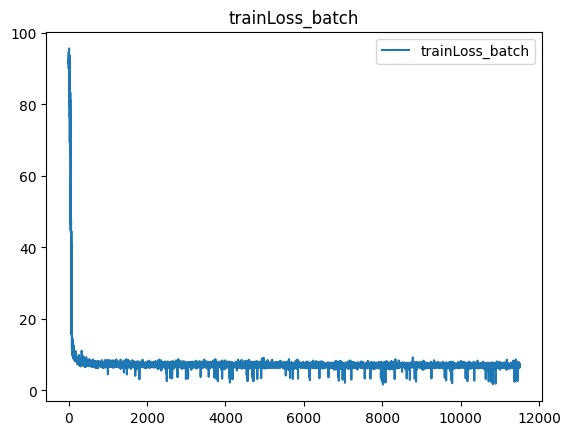

<Figure size 640x480 with 0 Axes>

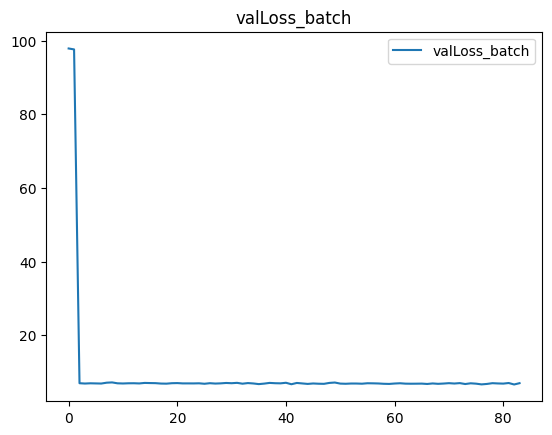

<Figure size 640x480 with 0 Axes>

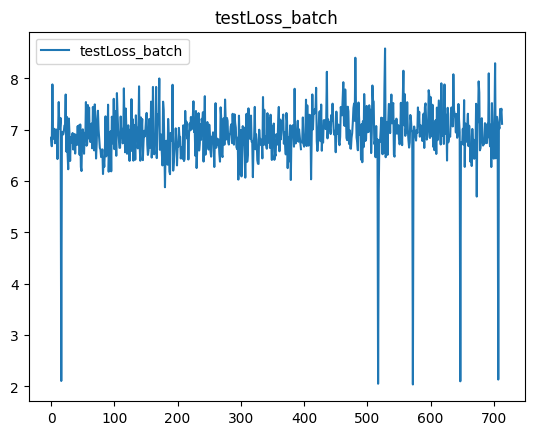

<Figure size 640x480 with 0 Axes>

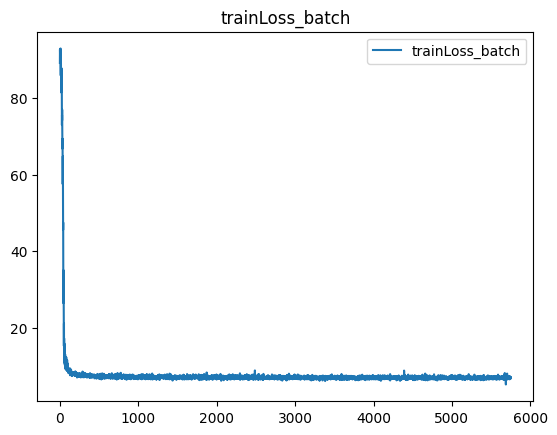

<Figure size 640x480 with 0 Axes>

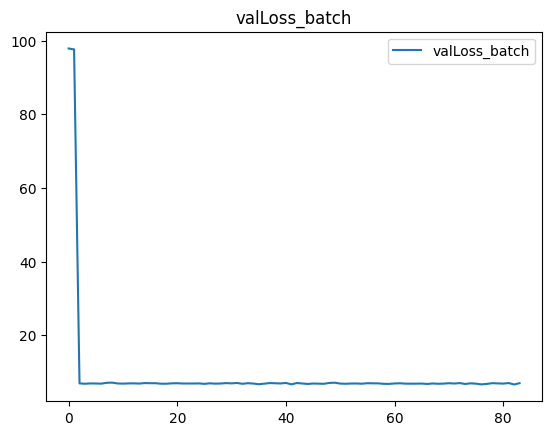

<Figure size 640x480 with 0 Axes>

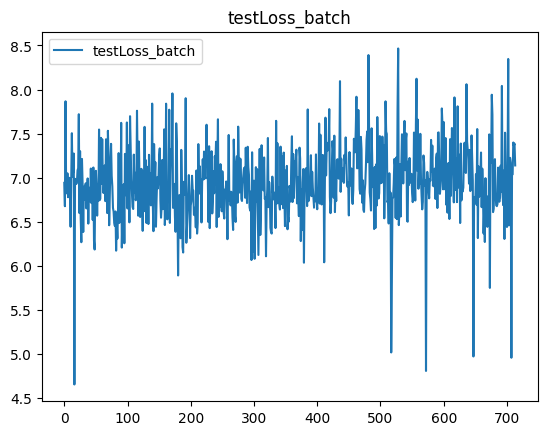

In [88]:
# # flip
base_time = 'delete this flip'
gpt2_small_config1 = {
    'MODEL_NAME' : 'gpt2',
    'TOKENIZER_NAME' : 'gpt2',
    'MAX_LENGTH' : 512,
    'TRAINING_BATCH_SIZE' : 16,
    'VALIDATION_BATCH_SIZE' : 16,
    'TEST_BATCH_SIZE' : 1,
    'TRAINING_EPOCHS' : 2,
    'SAVE_TOP_K' : 1,
    'SAVED_MODEL_PATH' : path_dict['saved_model_path'],
    'CSV_LOGGER_PATH' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/weights/csv_log',
    'TRAINING_DATA_PATH' : path_dict['toy_input_for_lightning_model_train_data_true'],
    'VALIDATION_DATA_PATH' : path_dict['toy_input_for_lightning_model_val_data_true'],
    'TEST_DATA_PATH' : path_dict['toy_input_for_lightning_model_test_data_true'],
    'LR' : 7e-5,
    'RANDOM_SEED' : 42,
    'CROSS_ENTROPY_IGNORE_INDEX' : -100,
    'COMPONENT_NAME' : 'CEG',
    'PROMPT_COMPONENTS' : ['statement','metadata','justification'],
    'TensorBoardLogger_NAME' : 'gpt2/small',
    'MODEL_FOLDER' : ['gpt2', 'small'],
    'INPUT_FLIP' : 1

}

# # GPT2-medium
# gpt2_medium_config1 = {
#     'MODEL_NAME' : 'gpt2-medium',
#     'TOKENIZER_NAME' : 'gpt2-medium',
#     'MAX_LENGTH' : 512,
#     'TRAINING_BATCH_SIZE' : 16,
#     'VALIDATION_BATCH_SIZE' : 16,
#     'TEST_BATCH_SIZE' : 1,
#     'TRAINING_EPOCHS' : 2,
#     'SAVE_TOP_K' : 1,
#     'SAVED_MODEL_PATH' : path_dict['saved_model_path'],
#     'CSV_LOGGER_PATH' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/weights/csv_log',
#     'TRAINING_DATA_PATH' : path_dict['toy_input_for_lightning_model_train_data_true'],
#     'VALIDATION_DATA_PATH' : path_dict['toy_input_for_lightning_model_val_data_true'],
#     'TEST_DATA_PATH' : path_dict['toy_input_for_lightning_model_test_data_true'],
#     'LR' : 7e-5,
#     'RANDOM_SEED' : 42,
#     'CROSS_ENTROPY_IGNORE_INDEX' : -100,
#     'COMPONENT_NAME' : 'CEG',
#     'PROMPT_COMPONENTS' : ['statement', 'metadata', 'justification'],
#     'TensorBoardLogger_NAME' : 'gpt2/medium',
#     'MODEL_FOLDER' : ['gpt2', 'medium'],
#     'INPUT_FLIP' : 1
# }
# # gpt2-small
# # true
for batch_size in [1, 2]:
    train_and_test_CEG(
        model_config=gpt2_small_config1,
        train_and_test_config=train_and_test_config_true,
        batch_size=batch_size,
        base_time=base_time,
        set_type='true')
# # # false
# for batch_size in [1, 2]:
#     train_and_test_CEG(
#         model_config=gpt2_small_config1,
#         train_and_test_config=train_and_test_config_false,
#         batch_size=batch_size,
#         base_time=base_time,
#         set_type='false')

# # gpt2-medium
# # true
# for batch_size in [1, 2]:
#     train_and_test_CEG(
#         model_config=gpt2_medium_config1,
#         train_and_test_config=train_and_test_config_true,
#         batch_size=batch_size,
#         base_time=base_time,
#         set_type='true')
# # # false
# for batch_size in [1, 2]:
#     train_and_test_CEG(
#         model_config=gpt2_medium_config1,
#         train_and_test_config=train_and_test_config_false,
#         batch_size=batch_size,
#         base_time=base_time,
#         set_type='false')


INFO:lightning_fabric.utilities.seed:Seed set to 42


----------- training and testing has just started (batch_size : 1) -----------
total_training_steps : 11504 , warmup_steps : 2300 
tokenizer : AutoTokenizer.from_pretrained(gpt2)
Before adding additional_special_tokens
['<|endoftext|>']
[50256]
After adding additional_special_tokens
['<|endoftext|>']
[50256]
exp_id : 50257
eos_id : 50256
pad_id : 50256
len(tokenizer) : 50258
---------- tokenizer information ----------
self.TOKENIZER_NAME : gpt2
self.tokenizer : GPT2TokenizerFast(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<|endoftext|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	50256: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	50257: AddedToken("[EXP]", rstrip=False, lstrip=False, single_word=False, norma

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


---------- model information ----------
self.MODEL_NAME : gpt2
dirpath : /content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/src/models/gpt2/small/delete this s only/true_batch_size=1
checkpoint_callback : <pytorch_lightning.callbacks.model_checkpoint.ModelCheckpoint object at 0x7b8519347e80>
tokenizer : AutoTokenizer.from_pretrained(gpt2)
Before adding additional_special_tokens
['<|endoftext|>']
[50256]
After adding additional_special_tokens
['<|endoftext|>']
[50256]
exp_id : 50257
eos_id : 50256
pad_id : 50256
len(tokenizer) : 50258
---------- tokenizer information ----------
self.TOKENIZER_NAME : gpt2
self.tokenizer : GPT2TokenizerFast(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<|endoftext|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	50256: AddedToken("<|en

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


tokenizer : AutoTokenizer.from_pretrained(gpt2)
Before adding additional_special_tokens
['<|endoftext|>']
[50256]
After adding additional_special_tokens
['<|endoftext|>']
[50256]
exp_id : 50257
eos_id : 50256
pad_id : 50256
len(tokenizer) : 50258
---------- tokenizer information ----------
self.TOKENIZER_NAME : gpt2
self.tokenizer : GPT2TokenizerFast(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<|endoftext|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	50256: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	50257: AddedToken("[EXP]", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False),
}
self.tokenizer_length : 50258
self.additional_special_tokens : None
self.eos_token : <|endoftext|>
se

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type             | Params
-----------------------------------------------
0 | model     | GPT2LMHeadModel  | 124 M 
1 | softmax   | Softmax          | 0     
2 | criterion | CrossEntropyLoss | 0     
-----------------------------------------------
124 M     Trainable params
0         Non-trainable params
124 M     Total params
497.762   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (4403 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1114 > 1024). Running this sequence through the model will result in indexing errors


Validation: |          | 0/? [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (2473 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1114 > 1024). Running this sequence through the model will result in indexing errors


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=2` reached.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.


tokenizer : AutoTokenizer.from_pretrained(gpt2)
Before adding additional_special_tokens
['<|endoftext|>']
[50256]
After adding additional_special_tokens
['<|endoftext|>']
[50256]
exp_id : 50257
eos_id : 50256
pad_id : 50256
len(tokenizer) : 50258
---------- tokenizer information ----------
self.TOKENIZER_NAME : gpt2
self.tokenizer : GPT2TokenizerFast(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<|endoftext|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	50256: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	50257: AddedToken("[EXP]", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False),
}
self.tokenizer_length : 50258
self.additional_special_tokens : None
self.eos_token : <|endoftext|>
se

INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/src/models/gpt2/small/delete this s only/true_batch_size=1/QTag-epoch=01-val_loss=6.89.ckpt


tokenizer : AutoTokenizer.from_pretrained(gpt2)
Before adding additional_special_tokens
['<|endoftext|>']
[50256]
After adding additional_special_tokens
['<|endoftext|>']
[50256]
exp_id : 50257
eos_id : 50256
pad_id : 50256
len(tokenizer) : 50258
---------- tokenizer information ----------
self.TOKENIZER_NAME : gpt2
self.tokenizer : GPT2TokenizerFast(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<|endoftext|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	50256: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	50257: AddedToken("[EXP]", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False),
}
self.tokenizer_length : 50258
self.additional_special_tokens : None
self.eos_token : <|endoftext|>
se

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:Loaded model weights from the checkpoint at /content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/src/models/gpt2/small/delete this s only/true_batch_size=1/QTag-epoch=01-val_loss=6.89.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (2191 > 1024). Running this sequence through the model will result in indexing errors


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │            nan            │
└───────────────────────────┴───────────────────────────┘

trainLoss_batch
len(np_metric) : 11504
valLoss_batch
len(np_metric) : 84
testLoss_batch
len(np_metric) : 714
src/models/gpt2/small/delete this s only/true_batch_size=1
file_type: src/models/gpt2/small/delete this s only/true_batch_size=1
gpt2/small/delete this s only/true_batch_size=1
ckpt_name : QTag-epoch=01-val_loss=6.89.ckpt
ckpt_path : src/models/gpt2/small/delete this s only/true_batch_size=1/QTag-epoch=01-val_loss=6.89.ckpt
tokenizer : AutoTokenizer.from_pretrained(gpt2)
Before adding additional_special_tokens
['<|endoftext|>']
[50256]
After adding additional_special_tokens
['<|endoftext|>']
[50256]
exp_id : 50257
eos_id : 50256
pad_id : 50256
len(tokenizer) : 50258
---------- tokenizer information ----------
self.TOKENIZER_NAME : gpt2
self.tokenizer : GPT2TokenizerFast(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': 

INFO:lightning_fabric.utilities.seed:Seed set to 42


----------- training and testing has just started (batch_size : 2) -----------
total_training_steps : 5752 , warmup_steps : 1150 
tokenizer : AutoTokenizer.from_pretrained(gpt2)
Before adding additional_special_tokens
['<|endoftext|>']
[50256]
After adding additional_special_tokens
['<|endoftext|>']
[50256]
exp_id : 50257
eos_id : 50256
pad_id : 50256
len(tokenizer) : 50258
---------- tokenizer information ----------
self.TOKENIZER_NAME : gpt2
self.tokenizer : GPT2TokenizerFast(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<|endoftext|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	50256: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	50257: AddedToken("[EXP]", rstrip=False, lstrip=False, single_word=False, normal

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


---------- model information ----------
self.MODEL_NAME : gpt2
dirpath : /content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/src/models/gpt2/small/delete this s only/true_batch_size=2
checkpoint_callback : <pytorch_lightning.callbacks.model_checkpoint.ModelCheckpoint object at 0x7b837aa504c0>
tokenizer : AutoTokenizer.from_pretrained(gpt2)
Before adding additional_special_tokens
['<|endoftext|>']
[50256]
After adding additional_special_tokens
['<|endoftext|>']
[50256]
exp_id : 50257
eos_id : 50256
pad_id : 50256
len(tokenizer) : 50258
---------- tokenizer information ----------
self.TOKENIZER_NAME : gpt2
self.tokenizer : GPT2TokenizerFast(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<|endoftext|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	50256: AddedToken("<|en

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


tokenizer : AutoTokenizer.from_pretrained(gpt2)
Before adding additional_special_tokens
['<|endoftext|>']
[50256]
After adding additional_special_tokens
['<|endoftext|>']
[50256]
exp_id : 50257
eos_id : 50256
pad_id : 50256
len(tokenizer) : 50258
---------- tokenizer information ----------
self.TOKENIZER_NAME : gpt2
self.tokenizer : GPT2TokenizerFast(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<|endoftext|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	50256: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	50257: AddedToken("[EXP]", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False),
}
self.tokenizer_length : 50258
self.additional_special_tokens : None
self.eos_token : <|endoftext|>
se

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type             | Params
-----------------------------------------------
0 | model     | GPT2LMHeadModel  | 124 M 
1 | softmax   | Softmax          | 0     
2 | criterion | CrossEntropyLoss | 0     
-----------------------------------------------
124 M     Trainable params
0         Non-trainable params
124 M     Total params
497.762   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (4403 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1114 > 1024). Running this sequence through the model will result in indexing errors


Validation: |          | 0/? [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (2473 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1114 > 1024). Running this sequence through the model will result in indexing errors


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=2` reached.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.


tokenizer : AutoTokenizer.from_pretrained(gpt2)
Before adding additional_special_tokens
['<|endoftext|>']
[50256]
After adding additional_special_tokens
['<|endoftext|>']
[50256]
exp_id : 50257
eos_id : 50256
pad_id : 50256
len(tokenizer) : 50258
---------- tokenizer information ----------
self.TOKENIZER_NAME : gpt2
self.tokenizer : GPT2TokenizerFast(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<|endoftext|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	50256: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	50257: AddedToken("[EXP]", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False),
}
self.tokenizer_length : 50258
self.additional_special_tokens : None
self.eos_token : <|endoftext|>
se

INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/src/models/gpt2/small/delete this s only/true_batch_size=2/QTag-epoch=01-val_loss=6.90.ckpt


tokenizer : AutoTokenizer.from_pretrained(gpt2)
Before adding additional_special_tokens
['<|endoftext|>']
[50256]
After adding additional_special_tokens
['<|endoftext|>']
[50256]
exp_id : 50257
eos_id : 50256
pad_id : 50256
len(tokenizer) : 50258
---------- tokenizer information ----------
self.TOKENIZER_NAME : gpt2
self.tokenizer : GPT2TokenizerFast(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<|endoftext|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	50256: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	50257: AddedToken("[EXP]", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False),
}
self.tokenizer_length : 50258
self.additional_special_tokens : None
self.eos_token : <|endoftext|>
se

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:Loaded model weights from the checkpoint at /content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/src/models/gpt2/small/delete this s only/true_batch_size=2/QTag-epoch=01-val_loss=6.90.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (2191 > 1024). Running this sequence through the model will result in indexing errors


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │            nan            │
└───────────────────────────┴───────────────────────────┘

trainLoss_batch
len(np_metric) : 5752
valLoss_batch
len(np_metric) : 84
testLoss_batch
len(np_metric) : 714
src/models/gpt2/small/delete this s only/true_batch_size=2
file_type: src/models/gpt2/small/delete this s only/true_batch_size=2
gpt2/small/delete this s only/true_batch_size=2
ckpt_name : QTag-epoch=01-val_loss=6.90.ckpt
ckpt_path : src/models/gpt2/small/delete this s only/true_batch_size=2/QTag-epoch=01-val_loss=6.90.ckpt
tokenizer : AutoTokenizer.from_pretrained(gpt2)
Before adding additional_special_tokens
['<|endoftext|>']
[50256]
After adding additional_special_tokens
['<|endoftext|>']
[50256]
exp_id : 50257
eos_id : 50256
pad_id : 50256
len(tokenizer) : 50258
---------- tokenizer information ----------
self.TOKENIZER_NAME : gpt2
self.tokenizer : GPT2TokenizerFast(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '

<Figure size 640x480 with 0 Axes>

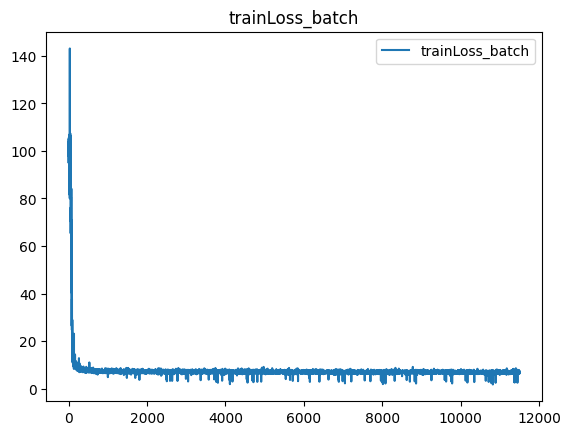

<Figure size 640x480 with 0 Axes>

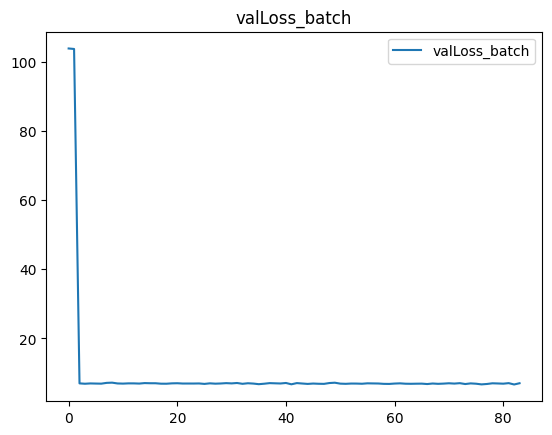

<Figure size 640x480 with 0 Axes>

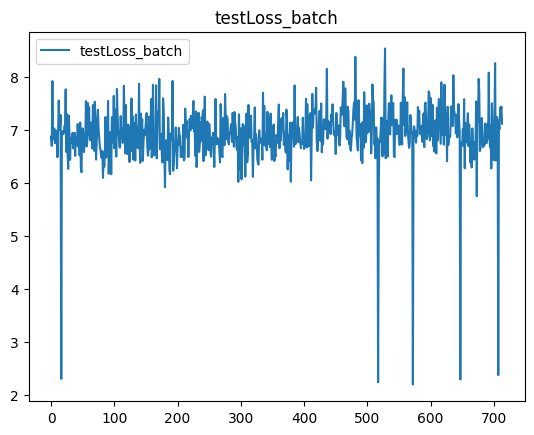

<Figure size 640x480 with 0 Axes>

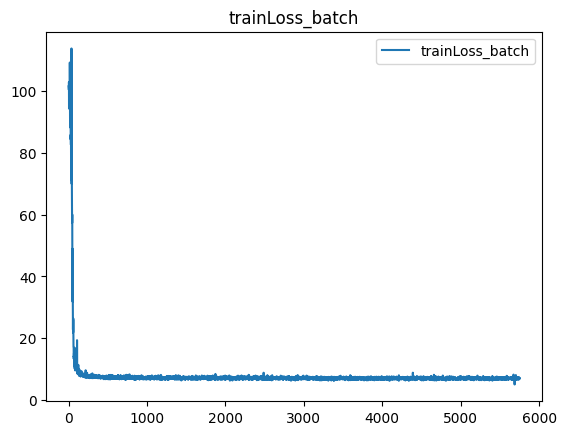

<Figure size 640x480 with 0 Axes>

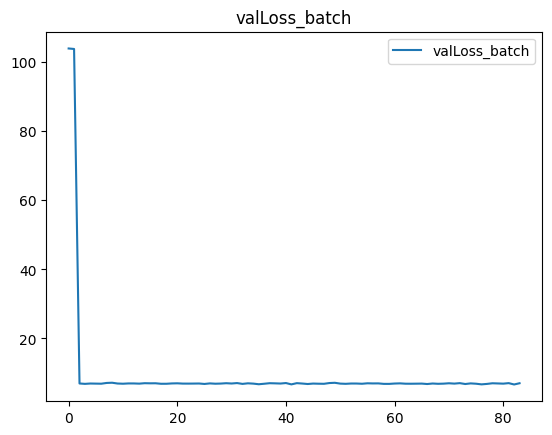

<Figure size 640x480 with 0 Axes>

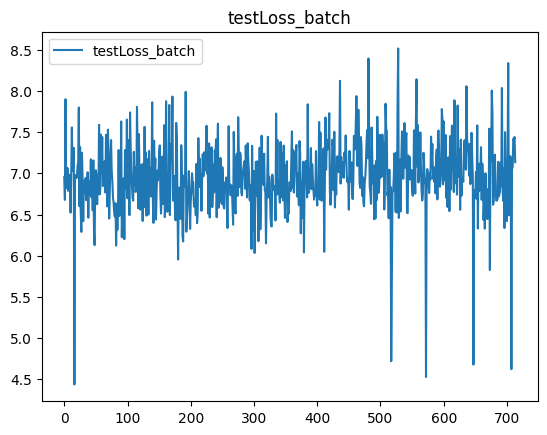

In [89]:
# statementのみ
# GPT2-small
base_time = 'delete this s only'

gpt2_small_config2 = {
    'MODEL_NAME' : 'gpt2',
    'TOKENIZER_NAME' : 'gpt2',
    'MAX_LENGTH' : 512,
    'TRAINING_BATCH_SIZE' : 16,
    'VALIDATION_BATCH_SIZE' : 16,
    'TEST_BATCH_SIZE' : 1,
    'TRAINING_EPOCHS' : 2,
    'SAVE_TOP_K' : 1,
    'SAVED_MODEL_PATH' : path_dict['saved_model_path'],
    'CSV_LOGGER_PATH' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/weights/csv_log',
    'TRAINING_DATA_PATH' : path_dict['toy_input_for_lightning_model_train_data_true'],
    'VALIDATION_DATA_PATH' : path_dict['toy_input_for_lightning_model_val_data_true'],
    'TEST_DATA_PATH' : path_dict['toy_input_for_lightning_model_test_data_true'],
    'LR' : 7e-5,
    'RANDOM_SEED' : 42,
    'CROSS_ENTROPY_IGNORE_INDEX' : -100,
    'COMPONENT_NAME' : 'CEG',
    'PROMPT_COMPONENTS' : ['statement', 'justification'],
    'TensorBoardLogger_NAME' : 'gpt2/small',
    'MODEL_FOLDER' : ['gpt2', 'small'],
    'INPUT_FLIP' : 0

}

# GPT2-medium
gpt2_medium_config2 = {
    'MODEL_NAME' : 'gpt2-medium',
    'TOKENIZER_NAME' : 'gpt2-medium',
    'MAX_LENGTH' : 512,
    'TRAINING_BATCH_SIZE' : 16,
    'VALIDATION_BATCH_SIZE' : 16,
    'TEST_BATCH_SIZE' : 1,
    'TRAINING_EPOCHS' : 2,
    'SAVE_TOP_K' : 1,
    'SAVED_MODEL_PATH' : path_dict['saved_model_path'],
    'CSV_LOGGER_PATH' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/weights/csv_log',
    'TRAINING_DATA_PATH' : path_dict['toy_input_for_lightning_model_train_data_true'],
    'VALIDATION_DATA_PATH' : path_dict['toy_input_for_lightning_model_val_data_true'],
    'TEST_DATA_PATH' : path_dict['toy_input_for_lightning_model_test_data_true'],
    'LR' : 7e-5,
    'RANDOM_SEED' : 42,
    'CROSS_ENTROPY_IGNORE_INDEX' : -100,
    'COMPONENT_NAME' : 'CEG',
    'PROMPT_COMPONENTS' : ['statement', 'justification'],
    'TensorBoardLogger_NAME' : 'gpt2/medium',
    'MODEL_FOLDER' : ['gpt2', 'medium'],
    'INPUT_FLIP' : 0
}

# gpt2-small
# true
for batch_size in [1, 2]:
    train_and_test_CEG(
        model_config=gpt2_small_config2,
        train_and_test_config=train_and_test_config_true,
        batch_size=batch_size,
        base_time=base_time,
        set_type='true')
# # # false
# for batch_size in [1, 2]:
#     train_and_test_CEG(
#         model_config=gpt2_small_config2,
#         train_and_test_config=train_and_test_config_false,
#         batch_size=batch_size,
#         base_time=base_time,
#         set_type='false')

# gpt2-medium
# # # true
# for batch_size in [1, 2]:
#     train_and_test_CEG(
#         model_config=gpt2_medium_config2,
#         train_and_test_config=train_and_test_config_true,
#         batch_size=batch_size,
#         base_time=base_time,
#         set_type='true')
# # # false
# for batch_size in [1, 2]:
#     train_and_test_CEG(
#         model_config=gpt2_medium_config2,
#         train_and_test_config=train_and_test_config_false,
#         batch_size=batch_size,
#         base_time=base_time,
#         set_type='false')


## 通しで推論

In [83]:
# # データのロード
# train_data_true = read_tsv(train_and_test_config_true["TRAINING_DATA_PATH"])
# train_data_false = read_tsv(train_and_test_config_false["TRAINING_DATA_PATH"])

In [84]:
# base_time = get_base_time()
# print(base_time)

In [85]:


# # # 推論の実行
# true_gpt2_bs1        = predict_CEG(gpt2_small_config_for_prediction, 'gpt2', train_data_true[:5], ckpt_dict_true['gpt2-small-bs1'], 'train', 'true', 1, time)
# true_gpt2_medium_bs1 = predict_CEG(gpt2_medium_config_for_prediction, 'gpt2-medium', train_data_true[:5], ckpt_dict_true['gpt2-medium-bs1'], 'train', 'true', 1, time)
# true_t5_small_bs1    = predict_CEG(t5_small_config_for_prediction, 't5-small', train_data_true[:5], ckpt_dict_true['t5-small-bs1'], 'train', 'true', 1, time)
# true_t5_base_bs1     = predict_CEG(t5_base_config_for_prediction, 't5-base', train_data_true[:5], ckpt_dict_true['t5-base-bs1'], 'train', 'true', 1, time)
# true_bart_base_bs1   = predict_CEG(bart_base_config_for_prediction, 'facebook/bart-base', train_data_true[:5], ckpt_dict_true['bart-base-bs1'], 'train', 'true', 1, time)

# true_gpt2_bs2        = predict_CEG(gpt2_small_config_for_prediction, 'gpt2', train_data_true[:5], ckpt_dict_true['gpt2-small-bs2'], 'train', 'true', 1, time)
# true_gpt2_medium_bs2 = predict_CEG(gpt2_medium_config_for_prediction, 'gpt2-medium', train_data_true[:5], ckpt_dict_true['gpt2-medium-bs2'], 'train', 'true', 1, time)
# true_t5_small_bs2    = predict_CEG(t5_small_config_for_prediction, 't5-small', train_data_true[:5], ckpt_dict_true['t5-small-bs2'], 'train', 'true', 1, time)
# true_t5_base_bs2     = predict_CEG(t5_base_config_for_prediction, 't5-base', train_data_true[:5], ckpt_dict_true['t5-base-bs2'], 'train', 'true', 1, time)
# true_bart_base_bs2   = predict_CEG(bart_base_config_for_prediction, 'facebook/bart-base', train_data_true[:5], ckpt_dict_true['bart-base-bs2'], 'train', 'true', 1, time)

# false_gpt2_bs1        = predict_CEG(gpt2_small_config_for_prediction, 'gpt2', train_data_false[:5], ckpt_dict_false['gpt2-small-bs1'], 'train', 'false', 1, time)
# false_gpt2_medium_bs1 = predict_CEG(gpt2_medium_config_for_prediction, 'gpt2-medium', train_data_false[:5], ckpt_dict_false['gpt2-medium-bs1'], 'train', 'false', 1, time)
# false_t5_small_bs1    = predict_CEG(t5_small_config_for_prediction, 't5-small', train_data_false[:5], ckpt_dict_false['t5-small-bs1'], 'train', 'false', 1, time)
# false_t5_base_bs1     = predict_CEG(t5_base_config_for_prediction, 't5-base', train_data_false[:5], ckpt_dict_false['t5-base-bs1'], 'train', 'false', 1, time)
# false_bart_base_bs1   = predict_CEG(bart_base_config_for_prediction, 'facebook/bart-base', train_data_false[:5], ckpt_dict_false['bart-base-bs1'], 'train', 'false', 1, time)

# false_gpt2_bs2        = predict_CEG(gpt2_small_config_for_prediction, 'gpt2', train_data_false[:5], ckpt_dict_false['gpt2-small-bs2'], 'train', 'false', 1, time)
# false_gpt2_medium_bs2 = predict_CEG(gpt2_medium_config_for_prediction, 'gpt2-medium', train_data_false[:5], ckpt_dict_false['gpt2-medium-bs2'], 'train', 'false', 1, time)
# false_t5_small_bs2    = predict_CEG(t5_small_config_for_prediction, 't5-small', train_data_false[:5], ckpt_dict_false['t5-small-bs2'], 'train', 'false', 1, time)
# false_t5_base_bs2     = predict_CEG(t5_base_config_for_prediction, 't5-base', train_data_false[:5], ckpt_dict_false['t5-base-bs2'], 'train', 'false', 1, time)
# false_bart_base_bs2   = predict_CEG(bart_base_config_for_prediction, 'facebook/bart-base', train_data_false[:5], ckpt_dict_false['bart-base-bs2'], 'train', 'false', 1, time)


## ちまちま推論
- 23: gpt2 入力入れ替え, gpt2 statementのみ

# BERTScoreの計算

In [86]:
# # データのロード
# train_data_true = read_tsv(train_and_test_config_true["TRAINING_DATA_PATH"])
# train_data_false = read_tsv(train_and_test_config_false["TRAINING_DATA_PATH"])

In [87]:
# base_time = get_base_time()
# print(base_time)

In [88]:
# # flip

# time = '2024-01-24 13:17 flip'

# # config_dict
# ckpt_dict_true = {
#     'gpt2-small-bs1' : f'{time}/true_batch_size=1',
#     'gpt2-small-bs2' : f'{time}/true_batch_size=2',
#     'gpt2-medium-bs1' : f'{time}/true_batch_size=1',
#     'gpt2-medium-bs2' : f'{time}/true_batch_size=2',
#     't5-small-bs1' : f'{time}/true_batch_size=1',
#     't5-small-bs2' : f'{time}/true_batch_size=2',
#     't5-base-bs1' : f'{time}/true_batch_size=1',
#     't5-base-bs2' : f'{time}/true_batch_size=2',
#     'bart-base-bs1' : f'{time}/true_batch_size=1',
#     'bart-base-bs2' : f'{time}/true_batch_size=2',
# }

# ckpt_dict_false = {
#     'gpt2-small-bs1' : f'{time}/false_batch_size=1',
#     'gpt2-small-bs2' : f'{time}/false_batch_size=2',
#     'gpt2-medium-bs1' : f'{time}/false_batch_size=1',
#     'gpt2-medium-bs2' : f'{time}/false_batch_size=2',
#     't5-small-bs1' : f'{time}/false_batch_size=1',
#     't5-small-bs2' : f'{time}/false_batch_size=2',
#     't5-base-bs1' : f'{time}/false_batch_size=1',
#     't5-base-bs2' : f'{time}/false_batch_size=2',
#     'bart-base-bs1' : f'{time}/false_batch_size=1',
#     'bart-base-bs2' : f'{time}/false_batch_size=2',
# }



# # GPT2-small

# predict_CEG(gpt2_small_config_for_prediction, 'gpt2', train_data_true[:5], ckpt_dict_true['gpt2-small-bs1'], 'train', 'true', 1, time)
# predict_CEG(gpt2_medium_config_for_prediction, 'gpt2-medium', train_data_true[:5], ckpt_dict_true['gpt2-medium-bs1'], 'train', 'true', 1, time)

# predict_CEG(gpt2_small_config_for_prediction, 'gpt2', train_data_true[:5], ckpt_dict_true['gpt2-small-bs2'], 'train', 'true', 1, time)
# predict_CEG(gpt2_medium_config_for_prediction, 'gpt2-medium', train_data_true[:5], ckpt_dict_true['gpt2-medium-bs2'], 'train', 'true', 1, time)

# predict_CEG(gpt2_small_config_for_prediction, 'gpt2', train_data_false[:5], ckpt_dict_false['gpt2-small-bs1'], 'train', 'false', 1, time)
# predict_CEG(gpt2_medium_config_for_prediction, 'gpt2-medium', train_data_false[:5], ckpt_dict_false['gpt2-medium-bs1'], 'train', 'false', 1, time)

# predict_CEG(gpt2_small_config_for_prediction, 'gpt2', train_data_false[:5], ckpt_dict_false['gpt2-small-bs2'], 'train', 'false', 1, time)
# predict_CEG(gpt2_medium_config_for_prediction, 'gpt2-medium', train_data_false[:5], ckpt_dict_false['gpt2-medium-bs2'], 'train', 'false', 1, time)


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

tokenizer : AutoTokenizer.from_pretrained(gpt2)
Before adding additional_special_tokens
['<|endoftext|>']
[50256]
After adding additional_special_tokens
['<|endoftext|>', '[EXP]']
[50256, 50257]
exp_id : 50257
eos_id : 50256
pad_id : 50256
len(tokenizer) : 50258
inputs_len : 59


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1473: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(


generated text : NoneNone<|endoftext|>
inputs_len : 39
generated text : NoneNone<|endoftext|>
inputs_len : 32
generated text : None<|endoftext|>
inputs_len : 55
generated text : None<|endoftext|>
inputs_len : 56
generated text : NoneNone<|endoftext|>
the extended data was saved in /content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/toy_prediction/2024-01-24 13:17 flip/gpt2_2024-01-24 13:17 flip_true_batch_size=1_true.tsv
tokenizer : AutoTokenizer.from_pretrained(gpt2-medium)
Before adding additional_special_tokens
['<|endoftext|>']
[50256]
After adding additional_special_tokens
['<|endoftext|>', '[EXP]']
[50256, 50257]
exp_id : 50257
eos_id : 50256
pad_id : 50256
len(tokenizer) : 50258
inputs_len : 59


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1473: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(


generated text : .<|endoftext|>
inputs_len : 39
generated text : .<|endoftext|>
inputs_len : 32
generated text : .<|endoftext|>
inputs_len : 55
generated text : .<|endoftext|>
inputs_len : 56
generated text : .<|endoftext|>
the extended data was saved in /content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/toy_prediction/2024-01-24 13:17 flip/gpt2-medium_2024-01-24 13:17 flip_true_batch_size=1_true.tsv
tokenizer : AutoTokenizer.from_pretrained(gpt2)
Before adding additional_special_tokens
['<|endoftext|>']
[50256]
After adding additional_special_tokens
['<|endoftext|>', '[EXP]']
[50256, 50257]
exp_id : 50257
eos_id : 50256
pad_id : 50256
len(tokenizer) : 50258
inputs_len : 59


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1473: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(


generated text : But the decline of coal has been largely attributed[EXP] to the decline[EXP] of the coal industry.But the decline of coal has been largely attributed to the decline of the coal industry.But the decline of coal has been largely attributed to the decline of the coal industry. But the decline[EXP] of coal has been largely attributed to the decline of the coal industry.But the decline of coal has been largely attributed[EXP] to the decline[EXP] of the coal industry[EXP]But the decline of coal has[EXP] been largely attributed to the decline of[EXP]The decline of coal has been largely attributed to the decline of the coal industry.But[EXP]The decline of coal has
inputs_len : 39
generated text :  "Clinton supports amnesty for undocumented immigrants. Clinton supports amnesty for undocumented immigrants. Clinton supports amnesty for[EXP] undocumented immigrants. Clinton supports amnesty for undocumented immigrants. Clinton supports amnesty[EXP] Clinton supports amnesty for und

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1473: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(


generated text :  of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the
inputs_len : 39
generated text :  of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the of the
inputs_len : 32
generated text : ... " " " " " " " "

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1473: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(


generated text : None. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the.
inputs_len : 32
generated text : None the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the
inputs_len : 38
generated text : None. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. the. t

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1473: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(


generated text : ,.....<|endoftext|>
inputs_len : 32
generated text :  toNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone
inputs_len : 38
generated text : NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneN

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1473: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(


generated text : ButTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheThe,, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the..
inputs_len : 32
generated text : ButTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheThe,, the, the, the, the, the, the, the, the, the, the
inputs_len : 38
generated text : ButTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTheTh

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1473: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(


generated text : .<|endoftext|>
inputs_len : 32
generated text :  to be able to be able to be able to be able to be able to be able to be able to be able to be able to be able to be to be to be to be to be to be to be to be to be to be to be to be to be to be to be to be to be to be to be to be to be to be to be to be to be to be to be to be to be to be to be to be to be to be to be to be to be to be to be to be to be to be to be to be to be to be to be to be to be
inputs_len : 38
generated text : .<|endoftext|>
inputs_len : 51
generated text : , state,state,state,state,state,state,state,state,state,state,state,state,state,state,state,state,state,state,state,state,state,state,state, state, state, state, state, state, state, state, state, state, state, state, state, state, state, state, state, state, state, state, state, state, state, state, state, state, state, state, state, state, state, state, state, state, state, state, state, state, state, state, state, state
inputs_len : 44
genera

In [89]:
# # statementのみ

# time = '2024-01-24 13:17 s only'

# # config_dict
# ckpt_dict_true = {
#     'gpt2-small-bs1' : f'{time}/true_batch_size=1',
#     'gpt2-small-bs2' : f'{time}/true_batch_size=2',
#     'gpt2-medium-bs1' : f'{time}/true_batch_size=1',
#     'gpt2-medium-bs2' : f'{time}/true_batch_size=2',
#     't5-small-bs1' : f'{time}/true_batch_size=1',
#     't5-small-bs2' : f'{time}/true_batch_size=2',
#     't5-base-bs1' : f'{time}/true_batch_size=1',
#     't5-base-bs2' : f'{time}/true_batch_size=2',
#     'bart-base-bs1' : f'{time}/true_batch_size=1',
#     'bart-base-bs2' : f'{time}/true_batch_size=2',
# }

# ckpt_dict_false = {
#     'gpt2-small-bs1' : f'{time}/false_batch_size=1',
#     'gpt2-small-bs2' : f'{time}/false_batch_size=2',
#     'gpt2-medium-bs1' : f'{time}/false_batch_size=1',
#     'gpt2-medium-bs2' : f'{time}/false_batch_size=2',
#     't5-small-bs1' : f'{time}/false_batch_size=1',
#     't5-small-bs2' : f'{time}/false_batch_size=2',
#     't5-base-bs1' : f'{time}/false_batch_size=1',
#     't5-base-bs2' : f'{time}/false_batch_size=2',
#     'bart-base-bs1' : f'{time}/false_batch_size=1',
#     'bart-base-bs2' : f'{time}/false_batch_size=2',
# }

# gpt2_small_config_for_prediction2 = {
#     'MODEL_NAME' : 'gpt2',
#     'TOKENIZER_NAME' : 'gpt2',
#     'MAX_LENGTH' : 512,
#     'TRAINING_BATCH_SIZE' : 16,
#     'VALIDATION_BATCH_SIZE' : 16,
#     'TEST_BATCH_SIZE' : 1,
#     'TRAINING_EPOCHS' : 2,
#     'SAVE_TOP_K' : 1,
#     'SAVED_MODEL_PATH' : path_dict['saved_model_path'],
#     'CSV_LOGGER_PATH' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/weights/csv_log',
#     'TRAINING_DATA_PATH' : path_dict['toy_input_for_lightning_model_train_data_true'],
#     'VALIDATION_DATA_PATH' : path_dict['toy_input_for_lightning_model_val_data_true'],
#     'TEST_DATA_PATH' : path_dict['toy_input_for_lightning_model_test_data_true'],
#     'LR' : 7e-5,
#     'RANDOM_SEED' : 42,
#     'CROSS_ENTROPY_IGNORE_INDEX' : -100,
#     'COMPONENT_NAME' : 'CEG',
#     'PROMPT_COMPONENTS' : ['statement'],
#     'TensorBoardLogger_NAME' : 'gpt2/small',
#     'MODEL_FOLDER' : ['gpt2', 'small'],
#     'INPUT_FLIP' : 0
# }

# # GPT2-medium
# gpt2_medium_config_for_prediction2 = {
#     'MODEL_NAME' : 'gpt2-medium',
#     'TOKENIZER_NAME' : 'gpt2-medium',
#     'MAX_LENGTH' : 512,
#     'TRAINING_BATCH_SIZE' : 16,
#     'VALIDATION_BATCH_SIZE' : 16,
#     'TEST_BATCH_SIZE' : 1,
#     'TRAINING_EPOCHS' : 2,
#     'SAVE_TOP_K' : 1,
#     'SAVED_MODEL_PATH' : path_dict['saved_model_path'],
#     'CSV_LOGGER_PATH' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/weights/csv_log',
#     'TRAINING_DATA_PATH' : path_dict['toy_input_for_lightning_model_train_data_true'],
#     'VALIDATION_DATA_PATH' : path_dict['toy_input_for_lightning_model_val_data_true'],
#     'TEST_DATA_PATH' : path_dict['toy_input_for_lightning_model_test_data_true'],
#     'LR' : 7e-5,
#     'RANDOM_SEED' : 42,
#     'CROSS_ENTROPY_IGNORE_INDEX' : -100,
#     'COMPONENT_NAME' : 'CEG',
#     'PROMPT_COMPONENTS' : ['statement'],
#     'TensorBoardLogger_NAME' : 'gpt2/medium',
#     'MODEL_FOLDER' : ['gpt2', 'medium'],
#     'INPUT_FLIP' : 0
# }

# true_gpt2_bs1        = predict_CEG(gpt2_small_config_for_prediction2, 'gpt2', train_data_true[:5], ckpt_dict_true['gpt2-small-bs1'], 'train', 'true', 1, time)
# true_gpt2_medium_bs1 = predict_CEG(gpt2_medium_config_for_prediction2, 'gpt2-medium', train_data_true[:5], ckpt_dict_true['gpt2-medium-bs1'], 'train', 'true', 1, time)

# true_gpt2_bs2        = predict_CEG(gpt2_small_config_for_prediction2, 'gpt2', train_data_true[:5], ckpt_dict_true['gpt2-small-bs2'], 'train', 'true', 1, time)
# true_gpt2_medium_bs2 = predict_CEG(gpt2_medium_config_for_prediction2, 'gpt2-medium', train_data_true[:5], ckpt_dict_true['gpt2-medium-bs2'], 'train', 'true', 1, time)

# false_gpt2_bs1        = predict_CEG(gpt2_small_config_for_prediction2, 'gpt2', train_data_false[:5], ckpt_dict_false['gpt2-small-bs1'], 'train', 'false', 1, time)
# false_gpt2_medium_bs1 = predict_CEG(gpt2_medium_config_for_prediction2, 'gpt2-medium', train_data_false[:5], ckpt_dict_false['gpt2-medium-bs1'], 'train', 'false', 1, time)

# false_gpt2_bs2        = predict_CEG(gpt2_small_config_for_prediction2, 'gpt2', train_data_false[:5], ckpt_dict_false['gpt2-small-bs2'], 'train', 'false', 1, time)
# false_gpt2_medium_bs2 = predict_CEG(gpt2_medium_config_for_prediction2, 'gpt2-medium', train_data_false[:5], ckpt_dict_false['gpt2-medium-bs2'], 'train', 'false', 1, time)


tokenizer : AutoTokenizer.from_pretrained(gpt2)
Before adding additional_special_tokens
['<|endoftext|>']
[50256]
After adding additional_special_tokens
['<|endoftext|>', '[EXP]']
[50256, 50257]
exp_id : 50257
eos_id : 50256
pad_id : 50256
len(tokenizer) : 50258
inputs_len : 32


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1473: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(


generated text : The.AndNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone
inputs_len : 24
generated text : Clinton"ClintonButTheClintonButTheClintonButTheClintonButTheClintonButTheClintonButTheClintonButTheClintonButTheClintonButTheClintonButTheClintonButTheClintonButTheClintonButTheClintonButTheClintonButTheClintonButTheClintonButTheClintonButTheClintonButTheClintonButTheClintonButTheClintonButTheClintonButTheClintonButTheClintonButTheClintonButThe ClintonButTheClintonButThe ClintonButThe ClintonButThe ClintonButThe ClintonButThe ClintonButTh

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1473: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(


generated text : NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone<|endoftext|>
inputs_len : 24
generated text : .<|endoftext|>
inputs_len : 14
generated text : The economic recoveryThe economic recoveryThe economic recoveryThe economic recoveryThe economic recoveryThe economic recoveryThe economic recoveryThe economic recoveryThe economic recoveryThe economic recoveryThe economic recoveryThe economic recoveryThe economic recoveryThe economic recoveryThe economic recoveryThe economic recoveryThe economic recoveryThe economic recoveryThe economic recoveryThe economic recoveryThe economic recoveryThe economic recoveryThe economic recoveryThe economic recoveryThe economic recoveryThe economic recoveryThe economic recoveryThe economic recoveryThe economic recoveryThe economic recoveryThe economic recoveryThe economic recoveryThe economic recoveryThe economic recoveryThe economic recoveryThe economic recoveryThe economic recoveryThe economic recoveryThe economic recoveryThe economic recovery

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1473: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(


generated text :  gas prices dropped dramatically.                                                                                                                           
inputs_len : 24
generated text :  McCain voted to authorize the invasion of Iraq. McCain voted to authorize the invasion of Iraq. McCain voted to authorize the invasion of Iraq. McCain voted to authorize the invasion of Iraq. McCain voted to authorize the invasion of Iraq. McCain voted to authorize the invasion of Iraq[EXP] McCain voted[EXP] McCain voted to authorize the invasion of Iraq. McCain voted to authorize[EXP] McCain voted to authorize the invasion[EXP] McCain voted to authorize the invasion of Iraq. McCain voted to authorize the invasion of Iraq. McCain voted[EXP] McCain voted to authorize the invasion of Iraq. McCain voted to authorize the invasion of Iraq. McCain voted to authorize the invasion of Iraq. McCain voted
inputs_len : 14
generated text :  said, "We're going[EXP] to be able[EXP] to be able to 

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1473: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(


generated text :  the[EXP] that[EXP].[EXP] the first time. in the first time. the first. the first. the first. the first, the first. the first. the first. the first. the first. the first. the first. the first. the first. the first. the first. the first. the first. the first. the first. the first. the first. the first. the first. the first. the first. the first. the first. the first. the first. the first. the first. the first. the first. the first. the first. the first. the first. the first
inputs_len : 24
generated text :  that[EXP] that[EXP] that's[EXP] that's[EXP] that[EXP] that[EXP] that[EXP] that[EXP] that's[EXP] that[EXP] that's[EXP] that[EXP] that's[EXP] that's[EXP] that's[EXP] that's[EXP] that's what[EXP] that's what I[EXP] that's what I[EXP] that's what I[EXP] that's what I[EXP] that's what I[EXP] that I[EXP] that's that's that's that's that's that's that's that's that's that's that's that's that's that's that's that's that's that's that's that's that's that's that's that's tha

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1473: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(


generated text : NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone
inputs_len : 16
generated text : NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneN

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1473: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(


generated text : .<|endoftext|>
inputs_len : 16
generated text :  health care reform legislation is likely[EXP] health care reform legislation is likely to mandate free sex change procedures. health care reform legislation is likely to mandate free sex change procedures. health care reform legislation is likely to mandate sex change procedures. health[EXP] health care reform legislation is likely to mandate sex change procedures. health care reform legislation is likely to mandate sex[EXP]. health care reform legislation is likely to mandate sex. health care reform legislation is likely[EXP] health care reform legislation is likely to mandate sex. health care reform legislation is likely to mandate sex. health care reform legislation is likely to mandate sex. health care reform legislation is likely to mandate sex. health
inputs_len : 18
generated text :  his wife is[EXP] his[EXP] his[EXP] a[EXP] a[EXP] a[EXP] a long time ago. He[EXP] a long time ago he[EXP] a long time ago. He has[EXP

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1473: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(


generated text : But abortion rights groups say abortion rights groups oppose abortion rights groups say abortion rights groups oppose abortion rights groups oppose abortion rights groups oppose abortion rights groups oppose abortion rights groups oppose abortion rights groups oppose abortion rights groups oppose abortion rights groups oppose abortion rights groups oppose abortion rights groups oppose abortion rights groups oppose abortion rights groups oppose abortion rights groups oppose abortion rights groups oppose abortion rights groups oppose abortion rights groups oppose abortion rights groups oppose abortion rights groups oppose abortion rights groups oppose abortion rights groups oppose abortion rights groups oppose abortion rights groups oppose abortion rights groups oppose abortion rights groups oppose abortion rights groups oppose abortion rights groups oppose abortion rights groups oppose abortion rights groups oppose abortion rights groups
inputs_len : 16
generated text :

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1473: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(


generated text :  third-trimester abortions on demand. third-tr[EXP] third-tr third-tr third-tr third-tr third-tr third-tr third[EXP] third-tr third-tr third-tr third[EXP]. third-tr third-tr third-tr third-tr third-tr third-tr third-tr third-tr third-tr third. third-tr third-tr third[EXP]. third-tr third-tr third. third. third. third. third. third. third. third. third. third. third. third. third. third. third. third. third. third. third. third.
inputs_len : 16
generated text :  health care reform bill is likely to mandate free sex change procedures. health care reform bill is likely[EXP], health care reform bill is likely, health care reform bill is likely, health[EXP] health care reform bill is likely, health care reform bill is likely, health care reform bill is likely, health care[EXP] health care reform bill is likely, health care reform bill is likely, health care reform bill is likely, health care reform bill is[EXP] health care reform bill is likely, health care reform bill is l

In [ ]:
# from time import sleep
# sleep(120)

# from google.colab import runtime

# runtime.unassign()

# 以降メモ

# GPT2

## 推論

In [ ]:
## modelのロード
my_model = CEG.load_from_checkpoint(gpt2_small_config['SAVED_MODEL_PATH']+'/QTag-epoch=20-val_loss=7.58.ckpt')
my_model.model.save_pretrained('./model_transformers/gpt2_small')
my_model_from_pretrained = GPT2LMHeadModel.from_pretrained('/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/model_transformers/gpt2_small')

In [ ]:
my_model_from_pretrained

In [ ]:
from transformers import GPT2Tokenizer, AutoConfig, GPT2LMHeadModel

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained('/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/model_transformers/gpt2_small')

# tokenizer.pad_token_id = tokenizer.eos_token_id
inputs = tokenizer(["Today is"], return_tensors="pt")
input_length = len(inputs["input_ids"][0])
print(f"inputs_len : {input_length}")

# greedy_search
# outputs = model.generate(**inputs, max_new_tokens=15, return_dict_in_generate=True, output_scores=True)
# beam_search
outputs = model.generate(
    **inputs,
    max_new_tokens=5,
    num_beams=4,
    num_return_sequences=1,
    return_dict_in_generate=True,
    output_scores=True,
)
print(f"outputs.sequences : {outputs.sequences}")
generated_tokens = outputs.sequences[:, input_length:]
print(f"generated_tokens : {generated_tokens}")

tokens_list = outputs.sequences[0]
print(tokens_list)
full_text = tokenizer.decode(tokens_list)
generated = tokenizer.decode(generated_tokens[0])

print(f"full text : {full_text}\n")
print(f"generated text: {generated}\n")
print(f"len(generated) : {len(tokenizer.tokenize(generated))}\n")

In [ ]:
## tokenzierの準備
my_prepare_tokenizer = Prepare_Tokenizer(gpt2_small_config)
my_prepare_tokenizer.get_tokenizer_info()
my_tokenizer = my_prepare_tokenizer.get_tokenizer()
my_prepare_tokenizer.get_tokenizer_info()

# データの準備
inputs = my_tokenizer(["Statement: Building a wall on the U.S.-Mexico border will take literally years. Metadata: immigration rick-perry Governor Texas republican Radio interview[EXP]"], return_tensors="pt")
input_length = len(inputs["input_ids"][0])
print(f"inputs_len : {input_length}")

outputs = my_model.generate(
    **inputs,
    max_new_tokens=5,
    num_beams=4,
    num_return_sequences=1,
    return_dict_in_generate=True,
    output_scores=True,
)
print(f"outputs.sequences : {outputs.sequences}")
generated_tokens = outputs.sequences[:, input_length:]
print(f"generated_tokens : {generated_tokens}")

tokens_list = outputs.sequences[0]
print(tokens_list)
full_text = my_tokenizer.decode(tokens_list)
generated = my_tokenizer.decode(generated_tokens[0])

print(f"full text : {full_text}\n")
print(f"generated text: {generated}\n")
print(f"len(generated) : {len(my_tokenizer.tokenize(generated))}\n")

there is no information. you need to call get_tokenizer() first.
tokenizer : AutoTokenizer.from_pretrained(gpt2)
Before adding additional_special_tokens
['<|endoftext|>']
[50256]
After adding additional_special_tokens
['<|endoftext|>', '[EXP]']
[50256, 50257]
exp_id : 50257
eos_id : 50256
pad_id : 50256
len(tokenizer) : 50258
---------- tokenizer information ----------
self.TOKENIZER_NAME : gpt2
self.tokenizer : GPT2TokenizerFast(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<|endoftext|>', 'additional_special_tokens': ['[EXP]']}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	50256: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	50257: AddedToken("[EXP]", rstrip=False, lstrip=False, single_word=False, normalized=Fals

NameError: name 'my_model' is not defined

In [ ]:
from transformers import GPT2Tokenizer, AutoConfig, GPT2LMHeadModel

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

# tokenizer.pad_token_id = tokenizer.eos_token_id
inputs = tokenizer(["Today is"], return_tensors="pt")
input_length = len(inputs["input_ids"][0])
print(f"inputs_len : {input_length}")

# greedy_search
# outputs = model.generate(**inputs, max_new_tokens=15, return_dict_in_generate=True, output_scores=True)
# beam_search
outputs = model.generate(
    **inputs,
    max_new_tokens=5,
    num_beams=4,
    num_return_sequences=1,
    return_dict_in_generate=True,
    output_scores=True,
)
print(f"outputs.sequences : {outputs.sequences}")
generated_tokens = outputs.sequences[:, input_length:]
print(f"generated_tokens : {generated_tokens}")

tokens_list = outputs.sequences[0]
print(tokens_list)
full_text = tokenizer.decode(tokens_list)
generated = tokenizer.decode(generated_tokens[0])

print(f"full text : {full_text}\n")
print(f"generated text: {generated}\n")
print(f"len(generated) : {len(tokenizer.tokenize(generated))}\n")

# T5デモ
- `<extra_id_0>`や`</s>`が出力に含まれてしまっている
- lm_head.weightsを初期化してもあまり効果が無い
- https://github.com/huggingface/transformers/blob/main/src/transformers/models/t5/modeling_t5.py
- https://www.kaggle.com/code/kreeshrajani/fine-tune-t5-for-conversational-model
- https://huggingface.co/docs/transformers/model_doc/t5#transformers.T5Tokenizer.sp_model_kwargs

## 公式サイトより

In [ ]:
from transformers import AutoTokenizer, T5ForConditionalGeneration

tokenizer = AutoTokenizer.from_pretrained("t5-small")
model = T5ForConditionalGeneration.from_pretrained("t5-small")

# training
input_ids = tokenizer("The <extra_id_0> walks in <extra_id_1> park", return_tensors="pt").input_ids
labels = tokenizer("<extra_id_0> cute dog <extra_id_1> the <extra_id_2>", return_tensors="pt").input_ids
outputs = model(input_ids=input_ids, labels=labels)
loss = outputs.loss
logits = outputs.logits

# inference
input_ids = tokenizer(
    "summarize: studies have shown that owning a dog is good for you", return_tensors="pt"
).input_ids  # Batch size 1
outputs = model.generate(input_ids)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))
# studies have shown that owning a dog is good for you.

## fine-tuning

In [ ]:
from transformers import AutoConfig, AutoTokenizer, T5ForConditionalGeneration
import torch
from torch import nn

tokenizer = AutoTokenizer.from_pretrained("t5-small")


print("Before")
print(tokenizer.all_special_tokens)
print(tokenizer.all_special_ids)
special_tokens_dict = {
    'additional_special_tokens': ['[EXP]']
    }

tokenizer.add_special_tokens(special_tokens_dict)
exp_id = tokenizer.convert_tokens_to_ids('[EXP]')
eos_id = tokenizer.convert_tokens_to_ids('</s>')
pad_id = tokenizer.convert_tokens_to_ids('<pad>')
print("After")
print(tokenizer.all_special_tokens)
print(tokenizer.all_special_ids)
print(f"exp_id : {exp_id}")
print(f"eos_id : {eos_id}")
print(f"pad_id : {pad_id}\n")
print(f"len(tokenizer) : {len(tokenizer)}")

model = T5ForConditionalGeneration.from_pretrained("t5-small")
print(f"before : {model.lm_head.weight.shape}")
print(f"before resizing : {model.lm_head.weight}")

model.resize_token_embeddings(len(tokenizer))

print("after : ", model.lm_head.weight.shape)
print(f"after resizing : {model.lm_head.weight.shape}")
print(f"before changing weights : {model.lm_head.weight.shape}")
print(f"focus : {model.lm_head.weight[:-1, :]}")
print(f"focus.shape : {model.lm_head.weight[:-1, :].shape}")
new_weights = torch.cat([model.lm_head.weight[:-1, :], torch.zeros(1, model.lm_head.weight.shape[1]) -10000])
model.lm_head.weight = torch.nn.Parameter(new_weights)
print(f"after changing weights : {model.lm_head.weight}")
print(f"new_weights.shape : {model.lm_head.weight.shape}")



Before
['</s>', '<unk>', '<pad>', '<extra_id_0>', '<extra_id_1>', '<extra_id_2>', '<extra_id_3>', '<extra_id_4>', '<extra_id_5>', '<extra_id_6>', '<extra_id_7>', '<extra_id_8>', '<extra_id_9>', '<extra_id_10>', '<extra_id_11>', '<extra_id_12>', '<extra_id_13>', '<extra_id_14>', '<extra_id_15>', '<extra_id_16>', '<extra_id_17>', '<extra_id_18>', '<extra_id_19>', '<extra_id_20>', '<extra_id_21>', '<extra_id_22>', '<extra_id_23>', '<extra_id_24>', '<extra_id_25>', '<extra_id_26>', '<extra_id_27>', '<extra_id_28>', '<extra_id_29>', '<extra_id_30>', '<extra_id_31>', '<extra_id_32>', '<extra_id_33>', '<extra_id_34>', '<extra_id_35>', '<extra_id_36>', '<extra_id_37>', '<extra_id_38>', '<extra_id_39>', '<extra_id_40>', '<extra_id_41>', '<extra_id_42>', '<extra_id_43>', '<extra_id_44>', '<extra_id_45>', '<extra_id_46>', '<extra_id_47>', '<extra_id_48>', '<extra_id_49>', '<extra_id_50>', '<extra_id_51>', '<extra_id_52>', '<extra_id_53>', '<extra_id_54>', '<extra_id_55>', '<extra_id_56>', '<extra

In [ ]:
input_text = 'Statement: When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration. Metadata: energy,history,job-accomplishments scott-surovell State delegate Virginia democrat a floor speech.'+ tokenizer.convert_ids_to_tokens(exp_id)
justification_text = 'Surovell said the decline of coal "started when natural gas took off  That started to begin in President (George W. ) Bushs administration. "No doubt, natural gas has been gaining ground on coal in generating electricity. The trend started in the 1990s but clearly gained speed during the Bush administration when the production of natural gas -- a competitor of coal -- picked up. But analysts give little credit or blame to Bush for that trend. They note that other factors, such as technological innovation, entrepreneurship and policies of previous administrations, had more to do with laying the groundwork for the natural gas boom.'
label_text = input_text  + justification_text + tokenizer.convert_ids_to_tokens(eos_id)
print(f"tokenized input_text : {tokenizer.tokenize(input_text)}\n")
print(f"tokenized label_text : {tokenizer.tokenize(label_text)}")
input_text_length = len(tokenizer.tokenize(input_text))
justification_text_length = len(tokenizer.tokenize(justification_text))
label_text_length = len(tokenizer.tokenize(label_text))
print(f"input_text_length : {input_text_length}")

input_encoding = tokenizer.encode_plus(
    input_text,
    add_special_tokens=True,
    max_length=label_text_length,
    padding="max_length",
    truncation=True,
    return_attention_mask=True,
    return_tensors='pt',
)

print(f"input_encoding : {input_encoding}\n")
decoded_input_encoding = tokenizer.decode(input_encoding["input_ids"][0])
# print(f"decoded input_encoding : {decoded_input_encoding}\n")

label_encoding = tokenizer.encode_plus(
    label_text,
    add_special_tokens=True,
    max_length=label_text_length,
    return_token_type_ids=False,
    padding="max_length",
    truncation=True,
    return_attention_mask=True,
    return_tensors='pt',
)

print(f"label_encoding : {label_encoding}")
# print(f"label_encoding['input_ids'][0] : {label_encoding['input_ids'][0]}")
decoded_label_encoding = tokenizer.decode(label_encoding["input_ids"][0])
# print(f"decoded label_encoding : {decoded_label_encoding}")
print(f"input prompt : {decoded_input_encoding}")
print(f"label : {decoded_label_encoding}")

labels = label_encoding["input_ids"]
print(f"labels before -100 masking : {labels}")
# decoded_labels = tokenizer.decode(labels)
# print(f"decoded labels : {decoded_labels}")
labels[:, :input_text_length] = -100 # cross_entropy_ignore_index
labels[:, label_text_length:] = -100
print(f"labels after -100 masking : {labels}")
print(f"labels.shape : {labels.shape}")

tokenized input_text : ['▁Statement', ':', '▁When', '▁did', '▁the', '▁decline', '▁of', '▁coal', '▁start', '?', '▁It', '▁started', '▁when', '▁natural', '▁gas', '▁took', '▁off', '▁that', '▁started', '▁to', '▁begin', '▁in', '▁(', 'P', 'resident', '▁George', '▁W', '.', ')', '▁Bush', 's', '▁administration', '.', '▁Meta', 'data', ':', '▁energy', ',', 'his', 'tory', ',', 'job', '-', 'acco', 'mp', 'l', 'ish', 'ments', '▁', 's', 'cott', '-', 'sur', 'o', 've', 'll', '▁State', '▁de', 'legate', '▁Virginia', '▁', 'democrat', '▁', 'a', '▁floor', '▁speech', '.', '[EXP]']

tokenized label_text : ['▁Statement', ':', '▁When', '▁did', '▁the', '▁decline', '▁of', '▁coal', '▁start', '?', '▁It', '▁started', '▁when', '▁natural', '▁gas', '▁took', '▁off', '▁that', '▁started', '▁to', '▁begin', '▁in', '▁(', 'P', 'resident', '▁George', '▁W', '.', ')', '▁Bush', 's', '▁administration', '.', '▁Meta', 'data', ':', '▁energy', ',', 'his', 'tory', ',', 'job', '-', 'acco', 'mp', 'l', 'ish', 'ments', '▁', 's', 'cott', '-',

In [ ]:
outputs = model(input_ids=input_encoding["input_ids"], attention_mask=input_encoding["attention_mask"], labels=labels)

print(f"model : {model}")
print(f"type(model) : {type(model)}")
print(f"type(outputs) : {type(outputs)}")

logits = outputs.logits
loss = outputs.loss
print(f"logits : {logits}")
print(f"logtis.size() : {logits.size()}")
print(f"loss : {loss}")

m = nn.Softmax(dim=1)
output = m(logits)
print(f"output : {output}")
print(f"output.size() : {output.size()}")
arg = torch.argmax(output, dim=2)
print(f"argmax(ouput) : {arg}") # --> tensor
print(f"argmax(ouput).size() : {arg.size()}")
print(f"argmax(output).dtype() : {arg.dtype}")
print(arg)
generated = tokenizer.decode(arg[0])
print(f"generated : {generated}")
print(f"len(generated) : {len(tokenizer.tokenize(generated))}")



model : T5ForConditionalGeneration(
  (shared): Embedding(32101, 512)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32101, 512)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=512, out_features=512, bias=False)
              (k): Linear(in_features=512, out_features=512, bias=False)
              (v): Linear(in_features=512, out_features=512, bias=False)
              (o): Linear(in_features=512, out_features=512, bias=False)
              (relative_attention_bias): Embedding(32, 8)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=512, out_features=2048, bias=False)
              (wo): Linear(in_features=2048, out_features=512, bias=False)
              (dropou

## 推論

In [ ]:
from transformers import AutoConfig, AutoTokenizer, T5ForConditionalGeneration
import torch
from torch import nn

tokenizer = AutoTokenizer.from_pretrained("t5-small")

tokenizer.pad_token_id = tokenizer.eos_token_id
inputs = tokenizer(["summarize: Today is"], return_tensors="pt")
input_length = len(inputs["input_ids"][0])
print(f"inputs_len : {input_length}")

# greedy_search
outputs = model.generate(**inputs, max_new_tokens=15, return_dict_in_generate=True, output_scores=True)
# beam_search
# outputs = model.generate(
#     **inputs,
#     max_new_tokens=5,
#     num_beams=4,
#     num_return_sequences=1,
#     return_dict_in_generate=True,
#     output_scores=True,
# )
print(f"outputs.sequences : {outputs.sequences}")
generated_tokens = outputs.sequences[:, input_length:]
print(f"generated_tokens : {generated_tokens}")

tokens_list = outputs.sequences[0]
print(tokens_list)
full_text = tokenizer.decode(tokens_list)
generated = tokenizer.decode(generated_tokens[0], skip_special_tokens=True)

print(f"full text : {full_text}\n")
print(f"generated text: {generated}\n")
print(f"len(generated) : {len(tokenizer.tokenize(generated))}\n")

# BART
- add_special_token=Trueにしたとき、先頭に`<s>`が追加されるため-100のマスキング時にinput_length+1

In [ ]:
from transformers import AutoConfig, AutoTokenizer, BartForConditionalGeneration
import torch
from torch import nn

tokenizer = AutoTokenizer.from_pretrained("facebook/bart-base")

print("Before")
print(tokenizer.all_special_tokens)
print(tokenizer.all_special_ids)
special_tokens_dict = {
    'additional_special_tokens': ['[EXP]']
    }

tokenizer.add_special_tokens(special_tokens_dict)
exp_id = tokenizer.convert_tokens_to_ids('[EXP]')
eos_id = tokenizer.convert_tokens_to_ids('</s>')
pad_id = tokenizer.convert_tokens_to_ids('<pad>')
print("After")
print(tokenizer.all_special_tokens)
print(tokenizer.all_special_ids)
print(f"exp_id : {exp_id}")
print(f"eos_id : {eos_id}")
print(f"pad_id : {pad_id}\n")
print(f"len(tokenizer) : {len(tokenizer)}")

model = BartForConditionalGeneration.from_pretrained("facebook/bart-base")
# print(f"before : {model.lm_head.weight.shape}")
# print(f"before resizing : {model.lm_head.weight}")

model.resize_token_embeddings(len(tokenizer))

# print("after : ", model.lm_head.weight.shape)
# print(f"after resizing : {model.lm_head.weight.shape}")
# print(f"before changing weights : {model.lm_head.weight.shape}")
# print(f"focus : {model.lm_head.weight[:-1, :]}")
# print(f"focus.shape : {model.lm_head.weight[:-1, :].shape}")
# new_weights = torch.cat([model.lm_head.weight[:-1, :], torch.zeros(1, model.lm_head.weight.shape[1]) -10000])
# model.lm_head.weight = torch.nn.Parameter(new_weights)
# print(f"after changing weights : {model.lm_head.weight}")
# print(f"new_weights.shape : {model.lm_head.weight.shape}")



In [ ]:
input_text = 'Statement: When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration. Metadata: energy,history,job-accomplishments scott-surovell State delegate Virginia democrat a floor speech.'+ tokenizer.convert_ids_to_tokens(exp_id)
justification_text = 'Surovell said the decline of coal "started when natural gas took off  That started to begin in President (George W. ) Bushs administration. "No doubt, natural gas has been gaining ground on coal in generating electricity. The trend started in the 1990s but clearly gained speed during the Bush administration when the production of natural gas -- a competitor of coal -- picked up. But analysts give little credit or blame to Bush for that trend. They note that other factors, such as technological innovation, entrepreneurship and policies of previous administrations, had more to do with laying the groundwork for the natural gas boom.'
label_text = input_text  + justification_text + tokenizer.convert_ids_to_tokens(eos_id)
print(f"tokenized input_text : {tokenizer.tokenize(input_text)}\n")
print(f"tokenized label_text : {tokenizer.tokenize(label_text)}")
input_text_length = len(tokenizer.tokenize(input_text))
justification_text_length = len(tokenizer.tokenize(justification_text))
label_text_length = len(tokenizer.tokenize(label_text))
print(f"input_text_length : {input_text_length}")

input_encoding = tokenizer.encode_plus(
    input_text,
    add_special_tokens=True,
    max_length=label_text_length,
    padding="max_length",
    truncation=True,
    return_attention_mask=True,
    return_tensors='pt',
)

print(f"input_encoding : {input_encoding}\n")
decoded_input_encoding = tokenizer.decode(input_encoding["input_ids"][0])
# print(f"decoded input_encoding : {decoded_input_encoding}\n")

label_encoding = tokenizer.encode_plus(
    label_text,
    add_special_tokens=True,
    max_length=label_text_length,
    return_token_type_ids=False,
    padding="max_length",
    truncation=True,
    return_attention_mask=True,
    return_tensors='pt',
)

print(f"label_encoding : {label_encoding}")
# print(f"label_encoding['input_ids'][0] : {label_encoding['input_ids'][0]}")
decoded_label_encoding = tokenizer.decode(label_encoding["input_ids"][0])
# print(f"decoded label_encoding : {decoded_label_encoding}")
print(f"input prompt : {decoded_input_encoding}")
print(f"label : {decoded_label_encoding}")

labels = label_encoding["input_ids"]
print(f"labels before -100 masking : {labels}")
# decoded_labels = tokenizer.decode(labels)
# print(f"decoded labels : {decoded_labels}")
labels[:, :input_text_length+1] = -100 # cross_entropy_ignore_index
labels[:, label_text_length:] = -100
print(f"labels after -100 masking : {labels}")
print(f"labels.shape : {labels.shape}")

In [ ]:
outputs = model(input_ids=input_encoding["input_ids"], attention_mask=input_encoding["attention_mask"], labels=labels)

print(f"model : {model}")
print(f"type(model) : {type(model)}")
print(f"type(outputs) : {type(outputs)}")

logits = outputs.logits
loss = outputs.loss
print(f"logits : {logits}")
print(f"logtis.size() : {logits.size()}")
print(f"loss : {loss}")

m = nn.Softmax(dim=1)
output = m(logits)
print(f"output : {output}")
print(f"output.size() : {output.size()}")
arg = torch.argmax(output, dim=2)
print(f"argmax(ouput) : {arg}") # --> tensor
print(f"argmax(ouput).size() : {arg.size()}")
print(f"argmax(output).dtype() : {arg.dtype}")
print(arg)
generated = tokenizer.decode(arg[0])
print(f"generated : {generated}")
print(f"len(generated) : {len(tokenizer.tokenize(generated))}")



## 推論